# 0. Installations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

path = "/content/drive/MyDrive/data/h1b.csv"
df_ = pd.read_csv(path)

# path = "/Users/mbenbanaste/Google Drive/data/h1b.csv"
# df_ = pd.read_csv(path)

# df_

In [3]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install eli5
!pip install pdpbox
!pip install pdp
!pip install shap
!pip install scikit-optimize

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from xgboost.sklearn import XGBClassifier

from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import seaborn as sns
import category_encoders as ce
from shap import TreeExplainer, initjs, force_plot

from skopt import BayesSearchCV


import io

df_.head();

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 245kB 4.3MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 28.1MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 604kB 47.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 296kB 34.5MB/s 
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=ccb9e5bbc652d26e13f4d742579ae3603f77a4235caebe72c9dd8a1beae2a06d
  Stored in directory: /root/.cache/pip/wheels/0e/c8/42/68bc8b9d86a040d84c1c76fa0104f6e0c89754595843093525
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=01f8096bc8a8e19abf88e76b2035e1ba9555b077d6453104ef688f113805d05f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: googl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Data Wrangling

## 1.0. Global changes

In [403]:
df__  = df_[df_['YEAR'].notna()]

In [404]:
df___ = df__[df__['CASE_STATUS'].notna()]

In [405]:
df____  = df___.drop(['lon','lat'], axis=1)

In [406]:
df_____ = df____.drop(columns='Unnamed: 0')

In [407]:
df______ = df_____.drop(columns='Unnamed: 0.1')

In [408]:
df_______ = df______.astype({'YEAR': 'int'})

In [409]:
df0 = df_______.set_index('YEAR')

In [410]:
df = df0.sort_index()

In [411]:
# df  = df[df.isnull().any(axis=1)]
df  = df.fillna('NA')
df['PREVAILING_WAGE'].replace('NA', 0, inplace=True)

In [412]:
df.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 2011 to 2016
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CASE_STATUS         500000 non-null  object 
 1   EMPLOYER_NAME       500000 non-null  object 
 2   SOC_NAME            500000 non-null  object 
 3   JOB_TITLE           500000 non-null  object 
 4   FULL_TIME_POSITION  500000 non-null  object 
 5   PREVAILING_WAGE     500000 non-null  float64
 6   WORKSITE            500000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 30.5+ MB


## 1.1. Reducing the High Cardinality of Columns

### 1.1.1. df['CASE_STATUS']

In [414]:
def c(x):
  if 'CERTIFIED-WITHDRAWN' in x:
    return 'DENIED, WITHDRAWN or PENDING'
  elif  'DENIED' in x:
    return 'DENIED, WITHDRAWN or PENDING'
  elif  'WITHDRAWN' in x:
    return 'DENIED, WITHDRAWN or PENDING'
  elif  'PENDING' in x:
    return 'DENIED, WITHDRAWN or PENDING'
  else:
    return 'CERTIFIED'

df.CASE_STATUS = df.CASE_STATUS.apply(c)

### 1.1.2. df['WORKSITE']

In [415]:
def f(x):
  if 'VIRGINIA' in x:
    return 'VIRGINIA'
  elif 'CONNECTICUT' in x:
    return 'CONNECTICUT'
  elif 'ALABAMA' in x:
    return 'ALABAMA'
  elif 'ALASKA' in x:
    return 'ALASKA'
  elif 'ARIZONA' in x:
    return 'ARIZONA'
  elif 'ARKANSAS' in x:
    return 'ARKANSAS'
  elif 'CALIFORNIA' in x:
    return 'CALIFORNIA'
  elif 'COLORADO' in x:
    return 'COLORADO'
  elif 'DELAWARE' in x:
    return 'DELAWARE'
  elif 'FLORIDA' in x:
    return 'FLORIDA'
  elif 'GEORGIA' in x:
    return 'GEORGIA'
  elif 'HAWAII' in x:
    return 'HAWAII'
  elif 'IDAHO' in x:
    return 'IDAHO'
  elif 'ILLINOIS' in x:
    return 'ILLINOIS'
  elif 'INDIANA' in x:
    return 'INDIANA'
  elif 'IOWA' in x:
    return 'IOWA'
  elif 'KANSAS' in x:
    return 'KANSAS'
  elif 'KENTUCKY' in x:
    return 'KENTUCKY'
  elif 'LOUISIANA' in x:
    return 'LOUISIANA'
  elif 'MAINE' in x:
    return 'MAINE'
  elif 'MARYLAND' in x:
    return 'MARYLAND'
  elif 'MASSACHUSETTS' in x:
    return 'MASSACHUSETTS'
  elif 'MICHIGAN' in x:
    return 'MICHIGAN'
  elif 'MINNESOTA' in x:
    return 'MINNESOTA'
  elif 'MISSISSIPPI' in x:
    return 'MISSISSIPPI'
  elif 'MISSOURI' in x:
    return 'MISSOURI'
  elif 'MONTANA' in x:
    return 'MONTANA'
  elif 'NEBRASKA' in x:
    return 'NEBRASKA'
  elif 'NEVADA' in x:
    return 'NEVADA'
  elif 'NEW HAMPSHIRE' in x:
    return 'NEW HAMPSHIRE'
  elif 'NEW JERSEY' in x:
    return 'NEW JERSEY'
  elif 'NEW MEXICO' in x:
    return 'NEW MEXICO'
  elif 'NEW YORK' in x:
    return 'NEW YORK'
  elif 'NORTH CAROLINA' in x:
    return 'NORTH CAROLINA'
  elif 'NORTH DAKOTA' in x:
    return 'NORTH DAKOTA'
  elif 'OHIO' in x:
    return 'OHIO'
  elif 'OKLAHOMA' in x:
    return 'OKLAHOMA'
  elif 'OREGON' in x:
    return 'OREGON'
  elif 'PENNSYLVANIA' in x:
    return 'PENNSYLVANIA'
  elif 'RHODE ISLAND' in x:
    return 'RHODE ISLAND'
  elif 'SOUTH CAROLINA' in x:
    return 'SOUTH CAROLINA'
  elif 'SOUTH DAKOTA' in x:
    return 'SOUTH DAKOTA'
  elif 'TENNESSEE' in x:
    return 'TENNESSEE'
  elif 'TEXAS' in x:
    return 'TEXAS'
  elif 'UTAH' in x:
    return 'UTAH'
  elif 'VERMONT' in x:
    return 'VERMONT'
  elif 'VIRGINIA' in x:
    return 'VIRGINIA'
  elif 'WASHINGTON' in x:
    return 'WASHINGTON'
  elif 'WEST VIRGINIA' in x:
    return 'WEST VIRGINIA'
  elif 'WISCONSIN' in x:
    return 'WISCONSIN'
  elif 'WYOMING' in x:
    return 'WYOMING'
  elif 'PUERTO RICO' in x:
    return 'PUERTO RICO'
  elif 'DISTRICT OF COLUMBIA' in x:
    return 'DISTRICT OF COLUMBIA'
  else: 
    return 'NA'

df.WORKSITE = df.WORKSITE.apply(f)

### 1.1.3. df['SO_NAME']

In [416]:
def cc(x):
  if  'Computer' in x:
    return 'Technology/Computer Occupation'
  elif  'COMPUTER' in x:
    return 'Technology/Computer Occupation'
  elif  'Software' in x:
    return 'Technology/Computer Occupation'
  elif  'SOFTWARE' in x:
    return 'Technology/Computer Occupation'
  elif  'Programmer' in x:
    return 'Technology/Computer Occupation'
  elif  'PROGRAMMER' in x:
    return 'Technology/Computer Occupation'
  elif  'Database' in x:
    return 'Technology/Computer Occupation'
  elif  'DATABASE' in x:
    return 'Technology/Computer Occupation'
  elif  'Web' in x:
    return 'Technology/Computer Occupation'
  elif  'WEB' in x:
    return 'Technology/Computer Occupation'
  elif  'Network' in x:
    return 'Technology/Computer Occupation'
  elif  'NETWORK' in x:
    return 'Technology/Computer Occupation'
  elif  'Information Security' in x:
    return 'Technology/Computer Occupation'
  elif  'INFORMATION SECURITY' in x:
    return 'Technology/Computer Occupation'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(cc)

In [417]:
def b(x):
  if  'Accountant' in x:
    return 'Business'
  elif  'ACCOUNTANT' in x:
    return 'Business'
  elif  'Accountants' in x:
    return 'Business'
  elif  'Financial' in x:
    return 'Business'
  elif  'FINANCIAL' in x:
    return 'Business'
  elif  'Management' in x:
    return 'Business'
  elif  'MANAGEMENT' in x:
    return 'Business'
  elif  'Market' in x:
    return 'Business'
  elif  'MARKET' in x:
    return 'Business'
  elif  'Marketing' in x:
    return 'Business'
  elif  'Business' in x:
    return 'Business'
  elif  'BUSINESS' in x:
    return 'Business'
  elif  'Advertising' in x:
    return 'Business'
  elif  'ADVERTISING' in x:
    return 'Business'
  elif  'Bank' in x:
    return 'Business'
  elif  'BANK' in x:
    return 'Business'
  elif  'Banking' in x:
    return 'Business'
  elif  'BANKING' in x:
    return 'Business'
  elif  'Consultant' in x:
    return 'Business'
  elif  'COUNSULTANT' in x:
    return 'Business'
  elif  'Consulting' in x:
    return 'Business'
  elif  'CONSULTING' in x:
    return 'Business'
  elif  'Insurance' in x:
    return 'Business'
  elif  'INSURANCE' in x:
    return 'Business'
  elif  'Investment' in x:
    return 'Business'
  elif  'INVETMENT' in x:
    return 'Business'
  elif  'Operations' in x:
    return 'Business'
  elif  'OPERATIONS' in x:
    return 'Business'
  elif  'Estate' in x:
    return 'Business'
  elif  'ESTATE' in x:
    return 'Business'
  elif  'Managers' in x:
    return 'Business'
  elif  'MANAGERS' in x:
    return 'Business'
  elif  'Logisticians' in x:
    return 'Business'
  elif  'LOGISTICIANS' in x:
    return 'Business'
  elif  'Cost' in x:
    return 'Business'
  elif  'COST' in x:
    return 'Business'
  elif  'Credit' in x:
    return 'Business'
  elif  'CREDIT' in x:
    return 'Business'
  elif  'Budget' in x:
    return 'Business'
  elif  'BUDGET' in x:
    return 'Business'
  elif  'Actuaries' in x:
    return 'Business'
  elif  'ACTUARIES' in x:
    return 'Business'
  elif  'Compliance' in x:
    return 'Business'
  elif  'COMPLIANCE' in x:
    return 'Business'
  elif  'Development Specialists' in x:
    return 'Business'
  elif  'DEVELOPMENT SPECIALISTS' in x:
    return 'Business'
  elif  'Auditors' in x:
    return 'Business'
  elif  'Auditors' in x:
    return 'Business'
  elif  'Compensation' in x:
    return 'Business'
  elif  'COMPENSATION' in x:
    return 'Business'
  elif  'Employment' in x:
    return 'Business'
  elif  'EMPLOYMENT' in x:
    return 'Business'
  elif  'Recruitment' in x:
    return 'Business'
  elif  'RECRUITMENT' in x:
    return 'Business'
  elif  'Executives' in x:
    return 'Business'
  elif  'EXECUTIVES' in x:
    return 'Business'
  elif  'Private Sector' in x:
    return 'Business'
  elif  'PRIVATE SECTOR' in x:
    return 'Business'
  elif  'Counselors' in x:
    return 'Business'
  elif  'COUNSELORS' in x:
    return 'Business'
  elif  'Loan' in x:
    return 'Business'
  elif  'LOAN' in x:
    return 'Business'
  elif  'Executive' in x:
    return 'Business'
  elif  'EXECUTIVE' in x:
    return 'Business'
  elif  'Administrative' in x:
    return 'Business'
  elif  'ADMINISTRATIVE' in x:
    return 'Business'
  elif  'Recruiters' in x:
    return 'Business'
  elif  'RECRUITERS' in x:
    return 'Business'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(b)

In [418]:
def e(x):
  if  'Education' in x:
    return 'Education'
  if  'EDUCATION' in x:
    return 'Education'
  if  'Teacher' in x:
    return 'Education'
  if  'TEACHER' in x:
    return 'Education'
  elif  'Teaching' in x:
    return 'Education'
  elif  'TEACHING' in x:
    return 'Education'
  elif  'Professor' in x:
    return 'Education'
  elif  'PROFESSOR' in x:
    return 'Education'
  elif  'Library' in x:
    return 'Education'
  elif  'LIBRARY' in x:
    return 'Education'
  elif  'Librarian' in x:
    return 'Education'
  elif  'LIBRARIAN' in x:
    return 'Education'
  elif  'Instructional Coordinators' in x:
    return 'Education'
  elif  'INSTRUCTIONAL COORDINATORS' in x:
    return 'Education'
  elif  'School' in x:
    return 'Education'
  elif  'SCHOOL' in x:
    return 'Education'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(e)

In [419]:
def m(x):
  if  'Writer' in x:
    return 'Media'
  if  'WRITER' in x:
    return 'Media'
  if  'Editor' in x:
    return 'Media'
  if  'EDITOR' in x:
    return 'Media'
  if  'Publishing' in x:
    return 'Media'
  if  'PUBLISHING' in x:
    return 'Media'
  if  'Public Relations' in x:
    return 'Media'
  if  'PUBLIC RELATIONS' in x:
    return 'Media'
  if  'Designer' in x:
    return 'Media'
  if  'DESIGNER' in x:
    return 'Media'
  if  'Designers' in x:
    return 'Media'
  if  'DESIGNERS' in x:
    return 'Media'
  if  'Directors' in x:
    return 'Media'
  if  'DIRECTORS' in x:
    return 'Media'
  if  'Producers' in x:
    return 'Media'
  if  'PRODUCERS' in x:
    return 'Media'
  if  'Reporters' in x:
    return 'Media'
  if  'REPORTERS' in x:
    return 'Media'
  if  'Media' in x:
    return 'Media'
  if  'MEDIA' in x:
    return 'Media'
  if  'Broadcast' in x:
    return 'Media'
  if  'BROADCAST' in x:
    return 'Media'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(m)

In [420]:
def art(x):
  if  'Art' in x:
    return 'Arts'
  if  'ART' in x:
    return 'Arts'
  if  'Artist' in x:
    return 'Arts'
  if  'ARTIST' in x:
    return 'Arts'
  if  'Museum' in x:
    return 'Arts'
  if  'MUSEUM' in x:
    return 'Arts'
  if  'Dancer' in x:
    return 'Arts'
  if  'DANCER' in x:
    return 'Arts'
  if  'Dancers' in x:
    return 'Arts'
  if  'DANCERS' in x:
    return 'Arts'
  if  'Models' in x:
    return 'Arts'
  if  'MODELS' in x:
    return 'Arts'
  if  'Curators' in x:
    return 'Arts'
  if  'CURATORS' in x:
    return 'Arts'
  if  'Photographers' in x:
    return 'Arts'
  if  'PHOTOGRAPHERS' in x:
    return 'Arts'
  if  'Multimedia' in x:
    return 'Arts'
  if  'MULTIMEDIA' in x:
    return 'Arts'
  if  'Musicians' in x:
    return 'Arts'
  if  'MUSICIANS' in x:
    return 'Arts'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(art)

In [421]:
def av(x):
  if  'Aircraft' in x:
    return 'Aviation'
  if  'AIRCRAFT' in x:
    return 'Aviation'
  if  'Airline' in x:
    return 'Aviation'
  if  'AIRLINE' in x:
    return 'Aviation'
  if  'Pilot' in x:
    return 'Aviation'
  if  'PILOT' in x:
    return 'Aviation'
  if  'Flight' in x:
    return 'Aviation'
  if  'FLIGHT' in x:
    return 'Aviation'
  if  'Aviation' in x:
    return 'Aviation'
  if  'AVIATION' in x:
    return 'Aviation'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(av)

In [422]:
def sci(x):
  if  'Retail' in x:
    return 'Service&Consumer Industry'
  if  'RETAIL' in x:
    return 'Service&Consumer Industry'
  if  'Sales' in x:
    return 'Service&Consumer Industry'
  if  'SALES' in x:
    return 'Service&Consumer Industry'
  if  'Automotive' in x:
    return 'Service&Consumer Industry'
  if  'AUTOMOTIVE' in x:
    return 'Service&Consumer Industry'
  if  'Hospitality' in x:
    return 'Service&Consumer Industry'
  if  'HOSPITALITY' in x:
    return 'Service&Consumer Industry'
  if  'Consumer' in x:
    return 'Service&Consumer Industry'
  if  'CONSUMER' in x:
    return 'Service&Consumer Industry'
  if  'Tour' in x:
    return 'Service&Consumer Industry'
  if  'TOUR' in x:
    return 'Service&Consumer Industry'
  if  'Transportation' in x:
    return 'Service&Consumer Industry'
  if  'TRANSPORTATION' in x:
    return 'Service&Consumer Industry'
  if  'Travel' in x:
    return 'Service&Consumer Industry'
  if  'TRAVEL' in x:
    return 'Service&Consumer Industry'
  if  'Human Resources' in x:
    return 'Service&Consumer Industry'
  if  'HUMAN RESOURCES' in x:
    return 'Service&Consumer Industry'
  if  'Translators' in x:
    return 'Service&Consumer Industry'
  if  'TRANSLATORS' in x:
    return 'Service&Consumer Industry'
  if  'Cooks' in x:
    return 'Service&Consumer Industry'
  if  'COOKS' in x:
    return 'Service&Consumer Industry'
  if  'Bakers' in x:
    return 'Service&Consumer Industry'
  if  'BAKERS' in x:
    return 'Service&Consumer Industry'
  if  'Planners' in x:
    return 'Service&Consumer Industry'
  if  'PLANNERS' in x:
    return 'Service&Consumer Industry'
  if  'Recreation' in x:
    return 'Service&Consumer Industry'
  if  'RECREATION' in x:
    return 'Service&Consumer Industry'
  if  'Social Workers' in x:
    return 'Service&Consumer Industry'
  if  'SOCIAL WORKERS' in x:
    return 'Service&Consumer Industry'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(sci)

In [423]:
def med(x):
  if  'Doctor' in x:
    return 'Medical/Health'
  if  'DOCTOR' in x:
    return 'Medical/Health'
  if  'Hospitalist' in x:
    return 'Medical/Health'
  if  'HOSPITALIST' in x:
    return 'Medical/Health'
  if  'Nurse' in x:
    return 'Medical/Health'
  if  'NURSE' in x:
    return 'Medical/Health'
  if  'Nursing' in x:
    return 'Medical/Health'
  if  'NURSING' in x:
    return 'Medical/Health'
  if  'Health' in x:
    return 'Medical/Health'
  if  'HEALTH' in x:
    return 'Medical/Health'
  if  'Parademic' in x:
    return 'Medical/Health'
  if  'PARAMEDIC' in x:
    return 'Medical/Health'
  if  'Pediatrician' in x:
    return 'Medical/Health'
  if  'PEDIATRICIAN' in x:
    return 'Medical/Health'
  if  'Psychologist' in x:
    return 'Medical/Health'
  if  'PSYCHOLOGIST' in x:
    return 'Medical/Health'
  if  'Psychiatrist' in x:
    return 'Medical/Health'
  if  'PSYCHIATRIST' in x:
    return 'Medical/Health'
  if  'Veterinarian' in x:
    return 'Medical/Health'
  if  'VETERINARIAN' in x:
    return 'Medical/Health'
  if  'Neurologist' in x:
    return 'Medical/Health'
  if  'NEUROLOGIST' in x:
    return 'Medical/Health'
  if  'Surgeons' in x:
    return 'Medical/Health'
  if  'SURGEONS' in x:
    return 'Medical/Health'
  if  'Medical' in x:
    return 'Medical/Health'
  if  'MEDICAL' in x:
    return 'Medical/Health'
  if  'Therapist' in x:
    return 'Medical/Health'
  if  'Therapists' in x:
    return 'Medical/Health'
  if  'THERAPIST' in x:
    return 'Medical/Health'
  if  'THERAPISTS' in x:
    return 'Medical/Health'
  if  'Radiologist' in x:
    return 'Medical/Health'
  if  'RADIOLOGIST' in x:
    return 'Medical/Health'
  if  'Radiologists' in x:
    return 'Medical/Health'
  if  'RADIOLOGISTS' in x:
    return 'Medical/Health'
  if  'Internist' in x:
    return 'Medical/Health'
  if  'INTERNIST' in x:
    return 'Medical/Health'
  if  'Internists' in x:
    return 'Medical/Health'
  if  'INTERNISTS' in x:
    return 'Medical/Health'
  if  'Dentists' in x:
    return 'Medical/Health'
  if  'DENTISTS' in x:
    return 'Medical/Health'
  if  'Family and General Practitioners' in x:
    return 'Medical/Health'
  if  'FAMILY AND GENERAL PRACTITIONERS' in x:
    return 'Medical/Health'
  if  'Pathologists' in x:
    return 'Medical/Health'
  if  'PATHOLOGISTS' in x:
    return 'Medical/Health'
  if  'Rehabilitation' in x:
    return 'Medical/Health'
  if  'REHABILITATION' in x:
    return 'Medical/Health'
  if  'Obstetricians' in x:
    return 'Medical/Health'
  if  'OBSTETRICIANS' in x:
    return 'Medical/Health'
  if  'Gynecologists' in x:
    return 'Medical/Health'
  if  'GYNECOLOGISTS' in x:
    return 'Medical/Health'
  if  'Dietitians' in x:
    return 'Medical/Health'
  if  'DIETITIANS' in x:
    return 'Medical/Health'
  if  'Physician' in x:
    return 'Medical/Health'
  if  'PHYSICIAN' in x:
    return 'Medical/Health'
  if  'Anesthesiologists' in x:
    return 'Medical/Health'
  if  'ANESTHESIOLOGISTS' in x:
    return 'Medical/Health'
  if  'Optometrists' in x:
    return 'Medical/Health'
  if  'OPTOMETRISTS' in x:
    return 'Medical/Health'
  if  'Pharmacy' in x:
    return 'Medical/Health'
  if  'PHARMACY' in x:
    return 'Medical/Health'
  if  'First-Line Supervisors' in x:
    return 'Medical/Health'
  if  'FIRST-LINE SUPERVISORS' in x:
    return 'Medical/Health'
  if  'Chiropractors' in x:
    return 'Medical/Health'
  if  'CHIROPRACTORS' in x:
    return 'Medical/Health'
  if  'Podiatrists' in x:
    return 'Medical/Health'
  if  'PODIATRISTS' in x:
    return 'Medical/Health'
  if  'Audiologists' in x:
    return 'Medical/Health'
  if  'AUDIOLOGISTS' in x:
    return 'Medical/Health'
  if  'Orthodontists' in x:
    return 'Medical/Health'
  if  'ORTHODONTISTS' in x:
    return 'Medical/Health'
  if  'Audiologists' in x:
    return 'Medical/Health'
  if  'AUDIOLOGISTS' in x:
    return 'Medical/Health'
  if  'Physiologists' in x:
    return 'Medical/Health'
  if  'PHYSIOLOGISTS' in x:
    return 'Medical/Health'
  # if  'Audiologists' in x:
  #   return 'Medical/Health'
  # if  'AUDIOLOGISTS' in x:
  #   return 'Medical/Health'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(med)

In [424]:
def bio(x):
  if  'Biological' in x:
    return 'Life Sciences'
  if  'BIOLOGICAL' in x:
    return 'Life Sciences'
  if  'Biologist' in x:
    return 'Life Sciences'
  if  'BIOLOGIST' in x:
    return 'Life Sciences'
  if  'Biologists' in x:
    return 'Life Sciences'
  if  'BIOLOGISTS' in x:
    return 'Life Sciences'
  if  'Biomedical' in x:
    return 'Life Sciences'
  if  'BIOMEDICAL' in x:
    return 'Life Sciences'
  if  'Biochemist' in x:
    return 'Life Sciences'
  if  'BIOCHEMIST' in x:
    return 'Life Sciences'
  if  'Biophysicist' in x:
    return 'Life Sciences'
  if  'BIOPHYSICIST' in x:
    return 'Life Sciences'
  if  'Biochemists' in x:
    return 'Life Sciences'
  if  'BIOCHEMISTS' in x:
    return 'Life Sciences'
  if  'Biophysicists' in x:
    return 'Life Sciences'
  if  'BIOPHYSICISTS' in x:
    return 'Life Sciences'
  if  'Bioinformatics' in x:
    return 'Life Sciences'
  if  'BIOINFORMATICS' in x:
    return 'Life Sciences'
  if  'Natural' in x:
    return 'Life Sciences'
  if  'NATURAL' in x:
    return 'Life Sciences'
  if  'Pharmacists' in x:
    return 'Life Sciences'
  if  'PHARMACISTS' in x:
    return 'Life Sciences'
  if  'Microbiologists' in x:
    return 'Life Sciences'
  if  'Life Scientists, All Other' in x:
    return 'Life Sciences'
  if  'LIFE SCIENTISTS' in x:
    return 'Life Sciences'
  if  'Soil' in x:
    return 'Life Sciences'
  if  'SOIL' in x:
    return 'Life Sciences'
  if  'Epidemiologists' in x:
    return 'Life Sciences'
  if  'EPIDEMIOLOGISTS' in x:
    return 'Life Sciences'
  if  'Animal Scientists' in x:
    return 'Life Sciences'
  if  'ANIMAL SCIENTISTS' in x:
    return 'Life Sciences'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(bio)

In [425]:
def science(x):
  if  'Chemist' in x:
    return 'Non-life Sciences'
  if  'CHEMIST' in x:
    return 'Non-life Sciences'
  if  'Chemists' in x:
    return 'Non-life Sciences'
  if  'CHEMISTS' in x:
    return 'Non-life Sciences'
  if  'Statisticians' in x:
    return 'Non-life Sciences'
  if  'STATISTICIANS' in x:
    return 'Non-life Sciences'
  if  'Physicists' in x:
    return 'Non-life Sciences'
  if  'PHYSICISTS' in x:
    return 'Non-life Sciences'
  if  'Geoscientists' in x:
    return 'Non-life Sciences'
  if  'GEOSCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Economists' in x:
    return 'Non-life Sciences'
  if  'ECONOMISTS' in x:
    return 'Non-life Sciences'
  if  'Food Scientists' in x:
    return 'Non-life Sciences'
  if  'FOOD SCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Food Science' in x:
    return 'Non-life Sciences'
  if  'FOOD SCIENCE' in x:
    return 'Non-life Sciences'
  if  'Social Science' in x:
    return 'Non-life Sciences'
  if  'SOCIAL SCIENCE' in x:
    return 'Non-life Sciences'
  if  'Social Scientists' in x:
    return 'Non-life Sciences'
  if  'SOCIAL SCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Mathematicians' in x:
    return 'Non-life Sciences'
  if  'MATHEMATICIANS' in x:
    return 'Non-life Sciences'
  if  'Environmental Scientists' in x:
    return 'Non-life Sciences'
  if  'Physical Scientists' in x:
    return 'Non-life Sciences'
  if  'PHYSICAL SCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Space Scientists' in x:
    return 'Non-life Sciences'
  if  'SPACE SCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Space Sciences' in x:
    return 'Non-life Sciences'
  if  'SPACE SCIENCES' in x:
    return 'Non-life Sciences'
  if  'Astronomers' in x:
    return 'Non-life Sciences'
  if  'ASTRONOMERS' in x:
    return 'Non-life Sciences'
  if  'Survey' in x:
    return 'Non-life Sciences'
  if  'SURVEY' in x:
    return 'Non-life Sciences'
  if  'Geographers' in x:
    return 'Non-life Sciences'
  if  'GEOGRAPHERS' in x:
    return 'Non-life Sciences'
  if  'Political Scientists' in x:
    return 'Non-life Sciences'
  if  'POLITICAL SCIENTISTS' in x:
    return 'Non-life Sciences'
  if  'Hydrologists' in x:
    return 'Non-life Sciences'
  if  'HYDROLOGISTS' in x:
    return 'Non-life Sciences'
  if  'Sociologists' in x:
    return 'Non-life Sciences'
  if  'SOCIOLOGISTS' in x:
    return 'Non-life Sciences'
  if  'Statistical' in x:
    return 'Non-life Sciences'
  if  'STATISTICAL' in x:
    return 'Non-life Sciences'
  if  'Mathematical' in x:
    return 'Non-life Sciences'
  if  'MATHEMATICAL' in x:
    return 'Non-life Sciences'
  if  'Cartographers' in x:
    return 'Non-life Sciences'
  if  'CARTOGRAPHERS' in x:
    return 'Non-life Sciences'
  if  'Agricultural Inspectors' in x:
    return 'Non-life Sciences'
  if  'AGRICULTURAL INSPECTORS' in x:
    return 'Non-life Sciences'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(science)

In [426]:
def law(x):
  if  'Law' in x:
    return 'Law'
  if  'LAW' in x:
    return 'Law'
  if  'Lawyer' in x:
    return 'Law'
  if  'LAWYER' in x:
    return 'Law'
  if  'Lawyers' in x:
    return 'Law'
  if  'LAWYERS' in x:
    return 'Law'
  if  'Judicial' in x:
    return 'Law'
  if  'JUDICIAL' in x:
    return 'Law'
  if  'Clerk' in x:
    return 'Law'
  if  'CLERK' in x:
    return 'Law'
  if  'Clerks' in x:
    return 'Law'
  if  'CLERKS' in x:
    return 'Law'
  if  'Legal' in x:
    return 'Law'
  if  'LEGAL' in x:
    return 'Law'
  if  'Law' in x:
    return 'Law'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(law)

In [427]:
def elc(x):
  if  'Electronic' in x:
    return 'Electrical and Electronic Engineering'
  if  'ELECTORNIC' in x:
    return 'Electrical and Electronic Engineering'
  if  'Electrical' in x:
    return 'Electrical and Electronic Engineering'
  if  'ELECTRICAL' in x:
    return 'Electrical and Electronic Engineering'
  if  'ELECTRCIAL' in x:
    return 'Electrical and Electronic Engineering'
  if  'Radio' in x:
    return 'Mechanical Engineering'
  if  'RADIO' in x:
    return 'Mechanical Engineering'
  if  'Radiologic' in x:
    return 'Mechanical Engineering'
  if  'RADIOLOGIC' in x:
    return 'Mechanical Engineering'
  if  'Electrician' in x:
    return 'Mechanical Engineering'
  if  'ELECTRICIAN' in x:
    return 'Mechanical Engineering'
  if  'Electricians' in x:
    return 'Mechanical Engineering'
  if  'ELECTRICIANS' in x:
    return 'Mechanical Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(elc)

In [428]:
def mech(x):
  if  'Mechanical' in x:
    return 'Mechanical Engineering'
  if  'MECHANICAL' in x:
    return 'Mechanical Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(mech)

In [429]:
def ind(x):
  if  'Industrial' in x:
    return 'Industrial Engineering'
  if  'INDUSTRIAL' in x:
    return 'Industrial Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(ind)

In [430]:
def cvl(x):
  if  'Civil' in x:
    return 'Civil Engineering'
  if  'CIVIL' in x:
    return 'Civil Engineering'
  if  'Environmental Engineers' in x:
    return 'Civil Engineering' 
  if  'ENVIRONMENTAL ENGINEERS' in x:
    return 'Civil Engineering'
  if  'Environmental Scientists' in x:
    return 'Civil Engineering' 
  if  'ENVIRONMENTAL SCIENTISTS' in x:
    return 'Civil Engineering'
  if  'Urban and Regional Planners' in x:
    return 'Civil Engineering' 
  if  'URBAN AND REGIONAL' in x:
    return 'Civil Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(cvl)

In [431]:
def oth(x):
  if  'Engineers, All Other' in x:
    return 'Engineering (Other)'
  if  'ENGINEERS, ALL OTHER' in x:
    return 'Engineering (Other)'
  if  'Engineering Technicians' in x:
    return 'Engineering (Other)'
  if  'ENGINEERING TECHNICIANS' in x:
    return 'Engineering (Other)'
  if  'Engineers' in x:
    return 'Engineering (Other)'
  if  'ENGINEERS' in x:
    return 'Engineering (Other)'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(oth)

In [432]:
def mater(x):
  if  'Materials' in x:
    return 'Materials Engineering'
  if  'MATERIALS' in x:
    return 'Materials Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(mater)

In [433]:
def mater(x):
  if  'Chemical Engineers' in x:
    return 'Chemical Engineering'
  if  'CHEMICAL ENGINEERS' in x:
    return 'Chemical Engineering'
  if  'Chemical Technicians' in x:
    return 'Chemical Engineering'
  if  'CHEMICAL TECHNICIANS' in x:
    return 'Chemical Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(mater)

In [434]:
def arc(x):
  if  'Architectural' in x:
    return 'Architectural Engineering'
  if  'Architects' in x:
    return 'Architectural Engineering'
  if  'ARCHITECTS' in x:
    return 'Architectural Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(arc)

In [435]:
def petro(x):
  if  'Petroleum' in x:
    return 'Petroleum Engineering'
  if  'PETROLEUM' in x:
    return 'Petroleum Engineering'
  # if  'ARCHITECTS' in x:
  #   return 'Architectural Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(petro)

In [436]:
def aero(x):
  if  'Aerospace Engineers' in x:
    return 'Aerospace Engineering'
  if  'AEROSPACE ENGINEERS' in x:
    return 'Aerospace Engineering'
  # if  'ARCHITECTS' in x:
  #   return 'Architectural Engineering'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(aero)

In [437]:
def spo(x):
  if 'Coaches' in x:
    return 'Sports'
  if  'COACHES' in x:
    return 'Sports'
  if  'Athletic' in x:
    return 'Sports'
  if  'ATHLETIC' in x:
    return 'Sports'
  if  'Fitness' in x:
    return 'Sports'
  if  'FITNESS' in x:
    return 'Sports'
  if  'Aerobics' in x:
    return 'Sports'
  if  'AEROBICS' in x:
    return 'Sports'
  else:
    return x

df.SOC_NAME = df.SOC_NAME.apply(spo)

In [438]:
# df[df['SOC_NAME'].str.contains("Engineers")]

In [439]:
top21_occ  = df['SOC_NAME'].value_counts().index[:21].tolist()

In [440]:
df.loc[~df["SOC_NAME"].isin(top21_occ), "SOC_NAME"] = "Other"

In [441]:
df['SOC_NAME'].value_counts().head(21)

Technology/Computer Occupation           316667
Business                                  69674
Medical/Health                            25885
Education                                 14894
Life Sciences                             11724
Non-life Sciences                         10293
Media                                      8948
Mechanical Engineering                     7754
Electrical and Electronic Engineering      6289
Engineering (Other)                        5921
Service&Consumer Industry                  4705
Civil Engineering                          4015
Industrial Engineering                     3245
NA                                         2945
Law                                        2261
Architectural Engineering                  1249
Other                                      1114
Arts                                        904
Materials Engineering                       701
Sports                                      562
Chemical Engineering                    

In [511]:
df['SOC_NAME'].nunique()

22

### 1.1.4. df['EMPLOYER_NAME']

In [443]:
top50_employer  = df['EMPLOYER_NAME'].value_counts().index[:50].tolist()

In [444]:
df.loc[~df["EMPLOYER_NAME"].isin(top50_employer), "EMPLOYER_NAME"] = "Other"

In [445]:
df['EMPLOYER_NAME'].value_counts().head(55)

Other                                              383337
INFOSYS LIMITED                                     21675
TATA CONSULTANCY SERVICES LIMITED                   10867
WIPRO LIMITED                                        7981
DELOITTE CONSULTING LLP                              6099
IBM INDIA PRIVATE LIMITED                            5763
ACCENTURE LLP                                        5514
MICROSOFT CORPORATION                                4322
HCL AMERICA, INC.                                    3750
ERNST & YOUNG U.S. LLP                               3091
LARSEN & TOUBRO INFOTECH LIMITED                     2949
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION      2897
CAPGEMINI AMERICA INC                                2866
GOOGLE INC.                                          2688
IBM CORPORATION                                      2285
IGATE TECHNOLOGIES INC.                              2053
INTEL CORPORATION                                    1940
TECH MAHINDRA 

In [446]:
df['EMPLOYER_NAME'].nunique()

51

### 1.1.5. df['JOB_TITLE']

In [447]:
def analyst(x):
  if 'ANALYST' in x:
    return 'ANALYST'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(analyst)

In [448]:
def engineer(x):
  if 'ENGINEER' in x:
    return 'ENGINEER'
  if  'ENGINEEER' in x:
    return 'ENGINEER'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(engineer)

In [449]:
def designer(x):
  if 'DESIGNER' in x:
    return 'DESIGNER'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(designer)

In [450]:
def consultant(x):
  if 'CONSULTANT' in x:
    return 'CONSULTANT'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(consultant)

In [451]:
def developer(x):
  if 'DEVELOPER' in x:
    return 'DEVELOPER'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(developer)

In [452]:
def manager(x):
  if 'MANAGER' in x:
    return 'MANAGER'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(manager)

In [453]:
def programmer(x):
  if 'PROGRAMMER' in x:
    return 'PROGRAMMER'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(programmer)

In [454]:
def staff(x):
  if 'STAFF' in x:
    return 'STAFF'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(staff)

In [455]:
def scientist(x):
  if 'SCIENTIST' in x:
    return 'SCIENTIST'
  if  'CHEMIST' in x:
    return 'SCIENTIST'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(scientist)

In [456]:
def research(x):
  if 'RESEARCH' in x:
    return 'RESEARCHER'
  if 'FELLOW' in x:
    return 'RESEARCHER'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(research)

In [457]:
def associate(x):
  if 'ASSOCIATE' in x:
    return 'ASSOCIATE'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(associate)

In [458]:
def admin(x):
  if 'ADMINISTRATOR' in x:
    return 'ADMINISTRATOR'
  # if  'COACHES' in x:
  #   return 'Sports'
  # if  'Athletic' in x:
  #   return 'Sports'
  # if  'ATHLETIC' in x:
  #   return 'Sports'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(admin)

In [459]:
def academic(x):
  if 'PROFESSOR' in x:
    return 'ACADEMIC/EDUCATION'
  if 'TEACHER' in x:
    return 'ACADEMIC/EDUCATION'
  if 'INSTRUCTOR' in x:
    return 'ACADEMIC/EDUCATION'
  if 'LECTURER' in x:
    return 'ACADEMIC/EDUCATION'
  if 'SCHOLAR' in x:
    return 'ACADEMIC/EDUCATION'
  if 'POSTDOCTORAL' in x:
    return 'ACADEMIC/EDUCATION'
  if 'EDUCATOR' in x:
    return 'ACADEMIC/EDUCATION'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(academic)

In [460]:
def specialist(x):
  if 'SPECIALIST' in x:
    return 'SPECIALIST'
  # if 'THERAPIST' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  # if 'HOSPITALIST' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  # if 'LECTURER' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  # if 'SCHOLAR' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  # if 'PHYSICIAN' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  # if 'PSYCHIATRIST' in x:
  #   return 'MEDICAL/HEALTH SPECIALIST'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(specialist)

In [461]:
def architect(x):
  if 'ARCHITECT' in x:
    return 'ARCHITECT'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(architect)

In [462]:
def exec(x):
  if 'EXECUTIVE' in x:
    return 'EXECUTIVE'
  if 'PRINCIPAL' in x:
    return 'EXECUTIVE'
  if 'PRESIDENT' in x:
    return 'EXECUTIVE'
  if 'CEO' in x:
    return 'EXECUTIVE'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(exec)

In [463]:
def chief(x):
  if 'CHIEF' and 'OFFICER' in x:
    return 'CHIEF OFFICER'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(chief)

In [464]:
def lead(x):
  if 'LEAD' in x:
    return 'TEAM LEAD'
  if 'LEADER' in x:
    return 'TEAM LEAD'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(lead)

In [465]:
def direct(x):
  if 'DIRECTOR' in x:
    return 'DIRECTOR'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(direct)

In [466]:
def accountant(x):
  if 'ACCOUNTANT' in x:
    return 'ACCOUNTANT'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(accountant)

In [467]:
def advisor(x):
  if 'ADVISOR' in x:
    return 'ADVISOR'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(advisor)

In [468]:
def coordinator(x):
  if 'COORDINATOR' in x:
    return 'COORDINATOR'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(coordinator)

In [469]:
def fashion(x):
  if 'FASHION' in x:
    return 'FASHION MODEL'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(fashion)

In [470]:
def tester(x):
  if 'TESTER' in x:
    return 'TESTER'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(tester)

In [471]:
def pharma(x):
  if 'PHARMACIST' in x:
    return 'PHARMACIST'
  if 'PHARMACY' in x:
    return 'PHARMACIST'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(pharma)

In [472]:
def statistician(x):
  if 'STATISTICIAN' in x:
    return 'STATISTICIAN'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(statistician)

In [473]:
def audit(x):
  if 'AUDITOR' in x:
    return 'AUDITOR'
  if 'AUDIT' in x:
    return 'AUDITOR'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(audit)

In [474]:
def resident(x):
  if 'RESIDENT' in x:
    return 'RESIDENT'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(resident)

In [475]:
def controller(x):
  if 'CONTROLLER' in x:
    return 'CONTROLLER'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(controller)

In [476]:
def translator(x):
  if 'TRANSLATOR' in x:
    return 'TRANSLATOR'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(translator)

In [477]:
def medical(x):
  if 'MEDICAL' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'THERAPIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'HOSPITALIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'LECTURER' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'SCHOLAR' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'PHYSICIAN' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'PSYCHIATRIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'DENTIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'NEPHROLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'VETERINARIAN' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'PEDIATRICIAN' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'NEUROLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'INTERNIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'CARDIOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'NURSE' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'OPTOMETRIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'ANESTHESIOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'GEOPHYSICIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'ENDOCRINOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'

  if 'ONCOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'CHIROPRACTOR' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'ACUPUNCTURIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'

  if 'PATHOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'GASTROENTEROLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'PULMONOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'

  if 'RADIOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'EPIDEMIOLOGIST' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  if 'SURGEON' in x:
    return 'MEDICAL/HEALTH SPECIALIST'
  else:
    return x

df.JOB_TITLE = df.JOB_TITLE.apply(medical)

In [478]:
top100_jobs  = df['JOB_TITLE'].value_counts().index[:100].tolist()

In [479]:
df.loc[~df["JOB_TITLE"].isin(top100_jobs), "JOB_TITLE"] = "Other"

In [480]:
df['JOB_TITLE'].value_counts().head()

ANALYST       132840
ENGINEER      102845
DEVELOPER      31973
MANAGER        31014
CONSULTANT     25839
Name: JOB_TITLE, dtype: int64

In [481]:
df['JOB_TITLE'].nunique()

101

# 2. Profile Report

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.1. Columns

In [ ]:
df['CASE_STATUS'].value_counts()

CERTIFIED                       435968
DENIED, WITHDRAWN or PENDING     64032
Name: CASE_STATUS, dtype: int64

In [ ]:
df['CASE_STATUS'].value_counts(normalize=True)

CERTIFIED                       0.871936
DENIED, WITHDRAWN or PENDING    0.128064
Name: CASE_STATUS, dtype: float64

In [ ]:
df['FULL_TIME_POSITION'].value_counts(normalize=True)

Y     0.857466
N     0.142532
NA    0.000002
Name: FULL_TIME_POSITION, dtype: float64

In [ ]:
df['PREVAILING_WAGE'].value_counts()

60000.0     1695
55245.0     1160
62566.0     1118
63877.0      967
51730.0      958
            ... 
88439.0        1
59189.0        1
88426.0        1
88423.0        1
262142.0       1
Name: PREVAILING_WAGE, Length: 27361, dtype: int64

In [ ]:
df60000 = df[df['PREVAILING_WAGE'] > 60000]

df60000.sort_values(by=['PREVAILING_WAGE'])

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
YEAR,,,,,,,
2016,CERTIFIED,NSG TECHNOLOGY INC.,MECHANICAL ENGINEERS,MECHANICAL ENGINEER,N,60001.0,CALIFORNIA
2014,CERTIFIED,"ERP ANALYSTS, INC.",Technology/Computer Occupation,JAVA DEVELOPER,Y,60008.0,OHIO
2012,CERTIFIED,VIEWSOFT INC.,Technology/Computer Occupation,SOFTWARE QA TESTER,Y,60008.0,WASHINGTON
2013,CERTIFIED,"HCL AMERICA, INC.",Technology/Computer Occupation,SYSTEMS ANALYST - I,Y,60008.0,CALIFORNIA
2013,CERTIFIED,SSINFOTEK INC.,Technology/Computer Occupation,PROGRAMMER ANALYST,Y,60008.0,CALIFORNIA
...,...,...,...,...,...,...,...
2016,"DENIED, WITHDRAWN or PENDING",E AND D MEDIA INC.,Business,"DIRECTOR, SOCIAL AND DIGITAL MEDIA",Y,329139200.0,CALIFORNIA
2012,"DENIED, WITHDRAWN or PENDING","CLINIC BY THE SEA, LLC",Medical,PHYSICIAN (GENERAL INVASIVE CARDIOLOGY/ELECTRO...,Y,346112000.0,DELAWARE
2013,"DENIED, WITHDRAWN or PENDING","MCLEOD REGIONAL MEDICAL CENTER OF THE PEE DEE,...","Internists, General",ASSOCIATE MED. DIRECTOR & HOSPICE/PALLIATIVE CARE,Y,348751520.0,SOUTH CAROLINA


In [ ]:
df['JOB_TITLE'].value_counts()

PROGRAMMER ANALYST                                    41324
SOFTWARE ENGINEER                                     20123
COMPUTER PROGRAMMER                                   11964
SYSTEMS ANALYST                                       10307
SOFTWARE DEVELOPER                                     7173
                                                      ...  
ENGINEER, PRODUCTION                                      1
DIRECTOR, WELLNESS PROGRAMS (RECREATIONAL SUPERVIS        1
VICE PRESIDENT, CFA EDUCATION                             1
SENIOR OBIEE ADMINISTRATOR                                1
RESEARCH ENGINEER SENIOR                                  1
Name: JOB_TITLE, Length: 84810, dtype: int64

In [ ]:
df['SOC_NAME'].value_counts()

Technology/Computer Occupation                 316077
Business                                        54446
Medical                                         21643
Education                                       13230
Life Sciences                                    8498
                                                ...  
Heavy and Tractor-Trailer Truck Drivers             1
Bakers                                              1
Ushers, Lobby Attendants, and Ticket Takers         1
Amusement and Recreation Attendants                 1
Insulation Workers, Mechanical                      1
Name: SOC_NAME, Length: 714, dtype: int64

In [ ]:
df['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      21675
TATA CONSULTANCY SERVICES LIMITED    10867
WIPRO LIMITED                         7981
DELOITTE CONSULTING LLP               6099
IBM INDIA PRIVATE LIMITED             5763
                                     ...  
NEOCIS, INC.                             1
INNOVATIVE SOLUTIONS LLC.                1
IRUNWAY INC                              1
CAPE COD HOSPITAL                        1
DUCON TECHNOLOGIES, INC.                 1
Name: EMPLOYER_NAME, Length: 88755, dtype: int64

In [ ]:
df['WORKSITE'].value_counts()

CALIFORNIA              93142
TEXAS                   49101
NEW YORK                48635
NEW JERSEY              35555
ILLINOIS                26860
WASHINGTON              20892
MASSACHUSETTS           19482
PENNSYLVANIA            18482
FLORIDA                 17645
GEORGIA                 17298
VIRGINIA                15514
MICHIGAN                13792
NORTH CAROLINA          13310
OHIO                    12889
MARYLAND                 9513
CONNECTICUT              8334
MINNESOTA                7988
ARIZONA                  6972
WISCONSIN                5314
COLORADO                 5237
INDIANA                  5007
TENNESSEE                4526
MISSOURI                 4395
OREGON                   3950
KANSAS                   3506
DELAWARE                 3063
IOWA                     2800
ARKANSAS                 2513
UTAH                     2195
KENTUCKY                 2125
SOUTH CAROLINA           2099
LOUISIANA                1949
RHODE ISLAND             1916
OKLAHOMA  

# 3. Statistical Information & their visualizations

## 3.1. Statistical information about the features

In [271]:
ftc = df.loc[(df['FULL_TIME_POSITION'] == 'Y') & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
   
ptc = df.loc[(df['FULL_TIME_POSITION'] != 'Y') & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

ftnc  = df.loc[(df['FULL_TIME_POSITION'] == 'Y') & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()
   
ptnc  = df.loc[(df['FULL_TIME_POSITION'] != 'Y') & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

print('Full-time position:', ftc + ftnc)
print('Part-time position:', ptc + ptnc)
print()
print('% of full-time position:', (ftc + ftnc)/5000)
print('% of part-time position:', (ptc + ptnc)/5000)
print()
print()
print('Certified:', ftc + ptc)
print('Denied, withrawn or pending:', ftnc +ptnc)
print()
print('% of certified:', (ftc + ptc)/5000)
print('% of denied, withrawn or pending:', (ftnc +ptnc)/5000)
print()
print()
print('Full-time position and certified:', ftc)
print('Part-time position and certified:', ptc)
print('Full-time position and denied, withrawn or pending:', ftnc)
print('Part-time position and denied, withrawn or pending:', ptnc)
print()
print('global% of full-time position and certified:', ftc/5000)
print('global% of part-time position and certified:', ptc/5000)
print('global% of full-time position and denied, withrawn or pending:', ftnc/5000)
print('global% of part-time position and denied, withrawn or pending:', ptnc/5000)
print()
print('% of full-time position and certified:', ftc/(ftc+ftnc))
print('% of part-time position and certified:', ptc/(ptc+ptnc))
print('% of full-time position and denied, withrawn or pending:', ftnc/(ftc+ftnc))
print('% of part-time position and denied, withrawn or pending:', ptnc/(ptc+ptnc))

Full-time position: 428733
Part-time position: 71267

% of full-time position: 85.7466
% of part-time position: 14.2534


Certified: 435968
Denied, withrawn or pending: 64032

% of certified: 87.1936
% of denied, withrawn or pending: 12.8064


Full-time position and certified: 374355
Part-time position and certified: 61613
Full-time position and denied, withrawn or pending: 54378
Part-time position and denied, withrawn or pending: 9654

global% of full-time position and certified: 74.871
global% of part-time position and certified: 12.3226
global% of full-time position and denied, withrawn or pending: 10.8756
global% of part-time position and denied, withrawn or pending: 1.9308

% of full-time position and certified: 0.8731658164871843
% of part-time position and certified: 0.864537584015042
% of full-time position and denied, withrawn or pending: 0.12683418351281567
% of part-time position and denied, withrawn or pending: 0.13546241598495798


In [119]:
u15 = df[df['PREVAILING_WAGE'] <= 15000].value_counts().sum()

b15_25 = df[(df['PREVAILING_WAGE'] > 15000) & (df['PREVAILING_WAGE'] <= 24999)].value_counts().sum()

b25_50  = df[(df['PREVAILING_WAGE'] > 24999) & (df['PREVAILING_WAGE'] <= 49999)].value_counts().sum()

b50_75  = df[(df['PREVAILING_WAGE'] > 49999) & (df['PREVAILING_WAGE'] <= 74999)].value_counts().sum()

b75_100 = df[(df['PREVAILING_WAGE'] > 74999) & (df['PREVAILING_WAGE'] <= 99999)].value_counts().sum()

b100_150  = df[(df['PREVAILING_WAGE'] > 99999) & (df['PREVAILING_WAGE'] <= 149999)].value_counts().sum()

b150_200  = df[(df['PREVAILING_WAGE'] > 149999) & (df['PREVAILING_WAGE'] <= 199999)].value_counts().sum()

b200_500  =df[(df['PREVAILING_WAGE'] > 199999) & (df['PREVAILING_WAGE'] <= 499999)].value_counts().sum()

b500_1m = df[(df['PREVAILING_WAGE'] > 499999) & (df['PREVAILING_WAGE'] <= 999999)].value_counts().sum()

over1m = df[df['PREVAILING_WAGE'] >= 999999].value_counts().sum()

print('# of applicants who earn under 15K:', u15)
print('# of applicants who earn between 15-25K:', b15_25)
print('# of applicants who earn between 25-50K:', b25_50)
print('# of applicants who earn between 50-75K:', b50_75)
print('# of applicants who earn between 75-100K:', b75_100)
print('# of applicants who earn between 100-150K:', b100_150)
print('# of applicants who earn between 150-200K:', b150_200)
print('# of applicants who earn between 200-500K:', b200_500)
print('# of applicants who earn between 500K-1 million:', b500_1m)
print('# of applicants who earn over 1 million :', over1m)
print()
print()
print('global% of applicants who earn under 15K:', u15/5000)
print('global% of applicants who earn between 15-25K:', b15_25/5000)
print('global% of applicants who earn between 25-50K:', b25_50/5000)
print('global% of applicants who earn between 50-75K:', b50_75/5000)
print('global% of applicants who earn between 75-100K:', b75_100/5000)
print('global% of applicants who earn between 100-150K:', b100_150/5000)
print('global% of applicants who earn between 150-200K:', b150_200/5000)
print('global% of applicants who earn between 200-500K:', b200_500/5000)
print('global% of applicants who earn between 500K-1 million:', b500_1m/5000)
print('global% of applicants who earn over 1 million :', over1m/5000)

# of applicants who earn under 15K: 29
# of applicants who earn between 15-25K: 1582
# of applicants who earn between 25-50K: 84281
# of applicants who earn between 50-75K: 250373
# of applicants who earn between 75-100K: 110727
# of applicants who earn between 100-150K: 45758
# of applicants who earn between 150-200K: 5448
# of applicants who earn between 200-500K: 1407
# of applicants who earn between 500K-1 million: 64
# of applicants who earn over 1 million : 331


% of applicants who earn under 15K: 0.0058
% of applicants who earn between 15-25K: 0.3164
% of applicants who earn between 25-50K: 16.8562
% of applicants who earn between 50-75K: 50.0746
% of applicants who earn between 75-100K: 22.1454
% of applicants who earn between 100-150K: 9.1516
% of applicants who earn between 150-200K: 1.0896
% of applicants who earn between 200-500K: 0.2814
% of applicants who earn between 500K-1 million: 0.0128
% of applicants who earn over 1 million : 0.0662


In [285]:
u15p = df[(df['PREVAILING_WAGE'] <= 15000) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b15_25p = df[(df['PREVAILING_WAGE'] > 15000) & (df['PREVAILING_WAGE'] <= 24999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b25_50p  = df[(df['PREVAILING_WAGE'] > 24999) & (df['PREVAILING_WAGE'] <= 49999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b50_75p  = df[(df['PREVAILING_WAGE'] > 49999) & (df['PREVAILING_WAGE'] <= 74999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b75_100p = df[(df['PREVAILING_WAGE'] > 74999) & (df['PREVAILING_WAGE'] <= 99999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b100_150p  = df[(df['PREVAILING_WAGE'] > 99999) & (df['PREVAILING_WAGE'] <= 149999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b150_200p  = df[(df['PREVAILING_WAGE'] > 149999) & (df['PREVAILING_WAGE'] <= 199999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b200_500p  =df[(df['PREVAILING_WAGE'] > 199999) & (df['PREVAILING_WAGE'] <= 499999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

b500_1mp = df[(df['PREVAILING_WAGE'] > 499999) & (df['PREVAILING_WAGE'] <= 999999) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

over1mp = df[df['PREVAILING_WAGE'] >= 999999].value_counts().sum()

print('# of certified applicants who earn under 15K:', u15p)
print('# of certified applicants who earn between 15-25K:', b15_25p)
print('# of certified applicants who earn between 25-50K:', b25_50p)
print('# of certified applicants who earn between 50-75K:', b50_75p)
print('# of certified applicants who earn between 75-100K:', b75_100p)
print('# of certified applicants who earn between 100-150K:', b100_150p)
print('# of certified applicants who earn between 150-200K:', b150_200p)
print('# of certified applicants who earn between 200-500K:', b200_500p)
print('# of certified applicants who earn between 500K-1 million:', b500_1mp)
print('# of certified applicants who earn over 1 million :', over1mp)
print()
print()
print('# of denied, withrawn or pending applicants who earn under 15K:', u15-u15p)
print('# of denied, withrawn or pending who earn between 15-25K:', b15_25-b15_25p)
print('# of denied, withrawn or pending who earn between 25-50K:', b25_50-b25_50p)
print('# of denied, withrawn or pending who earn between 50-75K:', b50_75-b50_75p)
print('# of denied, withrawn or pending who earn between 75-100K:', b75_100-b75_100p)
print('# of denied, withrawn or pending who earn between 100-150K:', b100_150-b100_150p)
print('# of denied, withrawn or pendings who earn between 150-200K:', b150_200-b150_200p)
print('# of denied, withrawn or pending who earn between 200-500K:', b200_500-b200_500p)
print('# of denied, withrawn or pending who earn between 500K-1 million:', b500_1m-b500_1mp)
print('# of denied, withrawn or pending who earn over 1 million :', over1m - over1mp)
print()
print()
print('% of certified applicants who earn under 15K:', (u15p/u15)*100)
print('% of certified applicants who earn between 15-25K:', (b15_25p/b15_25)*100)
print('% of certified applicants who earn between 25-50K:', (b25_50p/b25_50)*100)
print('% of certified applicants who earn between 50-75K:', (b50_75p/b50_75)*100)
print('% of certified applicants who earn between 75-100K:', (b75_100p/b75_100)*100)
print('% of certified applicants who earn between 100-150K:', (b100_150p/b100_150)*100)
print('% of certified applicants who earn between 150-200K:', (b150_200p/b150_200)*100)
print('% of certified applicants who earn between 200-500K:', (b200_500p/b200_500)*100)
print('% of certified applicants who earn between 500K-1 million:', (b500_1mp/b500_1m)*100)
print('% of certified applicants who earn over 1 million :', (over1mp/over1m)*100)

# of certified applicants who earn under 15K: 1
# of certified applicants who earn between 15-25K: 1174
# of certified applicants who earn between 25-50K: 70137
# of certified applicants who earn between 50-75K: 221476
# of certified applicants who earn between 75-100K: 97500
# of certified applicants who earn between 100-150K: 39944
# of certified applicants who earn between 150-200K: 4617
# of certified applicants who earn between 200-500K: 1104
# of certified applicants who earn between 500K-1 million: 10
# of certified applicants who earn over 1 million : 331


# of denied, withrawn or pending applicants who earn under 15K: 28
# of denied, withrawn or pending who earn between 15-25K: 408
# of denied, withrawn or pending who earn between 25-50K: 14144
# of denied, withrawn or pending who earn between 50-75K: 28897
# of denied, withrawn or pending who earn between 75-100K: 13227
# of denied, withrawn or pending who earn between 100-150K: 5814
# of denied, withrawn or pendings who ear

In [151]:
# Technology/Computer Occupation           316667
# Business                                  69674
# Medical/Health                            25885
# Education                                 14894
# Life Sciences                             11724
# Non-life Sciences                         10293
# Media                                      8948
# Mechanical Engineering                     7754
# Electrical and Electronic Engineering      6289
# Engineering (Other)                        5921

socname  = df['SOC_NAME'].value_counts().index.tolist()

tco = df.loc[(df['SOC_NAME'] == socname[0]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
tcon = df.loc[(df['SOC_NAME'] == socname[0]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

bus = df.loc[(df['SOC_NAME'] == socname[1]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
busn = df.loc[(df['SOC_NAME'] == socname[1]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

medh = df.loc[(df['SOC_NAME'] == socname[2]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
medhn = df.loc[(df['SOC_NAME'] == socname[2]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

edu = df.loc[(df['SOC_NAME'] == socname[3]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
edun = df.loc[(df['SOC_NAME'] == socname[3]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

ls = df.loc[(df['SOC_NAME'] == socname[4]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
lsn = df.loc[(df['SOC_NAME'] == socname[4]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

nls = df.loc[(df['SOC_NAME'] == socname[5]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
nlsn = df.loc[(df['SOC_NAME'] == socname[5]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

media = df.loc[(df['SOC_NAME'] == socname[6]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
media_n = df.loc[(df['SOC_NAME'] == socname[6]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

mechen = df.loc[(df['SOC_NAME'] == socname[7]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
mechenn = df.loc[(df['SOC_NAME'] == socname[7]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

elect = df.loc[(df['SOC_NAME'] == socname[8]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
electn = df.loc[(df['SOC_NAME'] == socname[8]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

engot = df.loc[(df['SOC_NAME'] == socname[9]) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
engotn = df.loc[(df['SOC_NAME'] == socname[9]) & (df['CASE_STATUS'] != 'CERTIFIED')].value_counts().sum()

print('# of technology/computer occupation applicants whose app is certified:', tco)
print('# of technology/computer occupation applicants whose app is denied, withdrawn or pending:', tcon)
print()
print('# of business applicants whose app is certified:', bus)
print('# of business applicants whose app is denied, withdrawn or pending:', busn)
print()
print('# of medical/health applicants whose app is certified:', medh)
print('# of medical/health applicants whose app is denied, withdrawn or pending:', medhn)
print()
print('# of education applicants whose app is certified:', edu)
print('# of education applicants whose app is denied, withdrawn or pending:', edun)
print()
print('# of life sciences applicants whose app is certified:', ls)
print('# of life sciences applicants whose app is denied, withdrawn or pending:', lsn)
print()
print('# of non-life sciences applicants whose app is certified:', nls)
print('# of non-life sciences applicants whose app is denied, withdrawn or pending:', nlsn)
print()
print('# of media applicants whose app is certified:', media)
print('# of media applicants whose app is denied, withdrawn or pending:', media_n)
print()
print('# of mechanical engineering applicants whose app is certified:', mechen)
print('# of mechanical engineering applicants whose app is denied, withdrawn or pending:', mechenn)
print()
print('# of electrical engineering applicants whose app is certified:', elect)
print('# of electrical engineering applicants whose app is denied, withdrawn or pending:', electn)
print()
print('# of engineering (other) applicants whose app is certified:', engot)
print('# of engineering (other) applicants whose app is denied, withdrawn or pending:', engotn)

# of technology/computer occupation applicants whose app is certified: 282898
# of technology/computer occupation applicants whose app is denied, withdrawn or pending: 33769

# of business applicants whose app is certified: 59207
# of business applicants whose app is denied, withdrawn or pending: 10467

# of medical/health applicants whose app is certified: 21638
# of medical/health applicants whose app is denied, withdrawn or pending: 4247

# of education applicants whose app is certified: 12294
# of education applicants whose app is denied, withdrawn or pending: 2600

# of life sciences applicants whose app is certified: 9302
# of life sciences applicants whose app is denied, withdrawn or pending: 2422

# of non-life sciences applicants whose app is certified: 8489
# of non-life sciences applicants whose app is denied, withdrawn or pending: 1804

# of media applicants whose app is certified: 7371
# of media applicants whose app is denied, withdrawn or pending: 1577

# of mechanical e

In [299]:
print('global% of technology/computer occupation applicants whose app is certified:', tco/5000)
print('global% of technology/computer occupation applicants whose app is denied, withdrawn or pending:', tcon/5000)
print()
print('global% of business applicants whose app is certified:', bus/5000)
print('global% of business applicants whose app is denied, withdrawn or pending:', busn/5000)
print()
print('global% of medical/health applicants whose app is certified:', medh/5000)
print('global% of medical/health applicants whose app is denied, withdrawn or pending:', medhn/5000)
print()
print('global% of education applicants whose app is certified:', edu/5000)
print('global% of education applicants whose app is denied, withdrawn or pending:', edun/5000)
print()
print('global% of life sciences applicants whose app is certified:', ls/5000)
print('global% of life sciences applicants whose app is denied, withdrawn or pending:', lsn/5000)
print()
print('global% of non-life sciences applicants whose app is certified:', nls/5000)
print('global% of non-life sciences applicants whose app is denied, withdrawn or pending:', nlsn/5000)
print()
print('global% of media applicants whose app is certified:', media/5000)
print('global% of media applicants whose app is denied, withdrawn or pending:', media_n/5000)
print()
print('global% of mechanical engineering applicants whose app is certified:', mechen/5000)
print('global% of mechanical engineering applicants whose app is denied, withdrawn or pending:', mechenn/5000)
print()
print('global% of electrical engineering applicants whose app is certified:', elect/5000)
print('global% of electrical engineering applicants whose app is denied, withdrawn or pending:', electn/5000)
print()
print('global% of engineering (other) applicants whose app is certified:', engot/5000)
print('global% of engineering (other) applicants whose app is denied, withdrawn or pending:', engotn/5000)

global% of technology/computer occupation applicants whose app is certified: 59.1776156837479
global% of technology/computer occupation applicants whose app is denied, withdrawn or pending: 7.063920225750917

global% of business applicants whose app is certified: 12.385132068051602
global% of business applicants whose app is denied, withdrawn or pending: 2.1895245048101764

global% of medical/health applicants whose app is certified: 4.3276
global% of medical/health applicants whose app is denied, withdrawn or pending: 0.8494

global% of education applicants whose app is certified: 2.4588
global% of education applicants whose app is denied, withdrawn or pending: 0.52

global% of life sciences applicants whose app is certified: 1.8604
global% of life sciences applicants whose app is denied, withdrawn or pending: 0.4844

global% of non-life sciences applicants whose app is certified: 1.6978
global% of non-life sciences applicants whose app is denied, withdrawn or pending: 0.3608

global%

In [154]:
print('% of technology/computer occupation applicants whose app is certified:', tco/(tco+tcon)*100)
print('% of technology/computer occupation applicants whose app is denied, withdrawn or pending:', tcon/(tco+tcon)*100)
print()
print('% of business applicants whose app is certified:', bus/(bus+busn)*100)
print('% of business applicants whose app is denied, withdrawn or pending:', busn/(bus+busn)*100)
print()
print('% of medical/health applicants whose app is certified:', medh/(medh+medhn)*100)
print('% of medical/health applicants whose app is denied, withdrawn or pending:', medhn/(medh+medhn)*100)
print()
print('% of education applicants whose app is certified:', edu/(edu+edun)*100)
print('% of education applicants whose app is denied, withdrawn or pending:', edun/(edu+edun)*100)
print()
print('% of life sciences applicants whose app is certified:', ls/(ls+lsn)*100)
print('% of life sciences applicants whose app is denied, withdrawn or pending:', lsn/(ls+lsn)*100)
print()
print('% of non-life sciences applicants whose app is certified:', nls/(nls+nlsn)*100)
print('% of non-life sciences applicants whose app is denied, withdrawn or pending:', nlsn/(nls+nlsn)*100)
print()
print('% of media applicants whose app is certified:', media/(media+media_n)*100)
print('% of media applicants whose app is denied, withdrawn or pending:', media_n/(media+media_n)*100)
print()
print('% of mechanical engineering applicants whose app is certified:', mechen/(mechen+mechenn)*100)
print('% of mechanical engineering applicants whose app is denied, withdrawn or pending:', mechenn/(mechen+mechenn)*100)
print()
print('% of electrical engineering applicants whose app is certified:', elect/(elect+electn)*100)
print('% of electrical engineering applicants whose app is denied, withdrawn or pending:', electn/(elect+electn)*100)
print()
print('% of engineering (other) applicants whose app is certified:', engot/(engot+engotn)*100)
print('% of engineering (other) applicants whose app is denied, withdrawn or pending:', engotn/(engot+engotn)*100)

% of technology/computer occupation applicants whose app is certified: 89.33611648829843
% of technology/computer occupation applicants whose app is denied, withdrawn or pending: 10.663883511701567

% of business applicants whose app is certified: 84.97717943565749
% of business applicants whose app is denied, withdrawn or pending: 15.02282056434251

% of medical/health applicants whose app is certified: 83.59281437125749
% of medical/health applicants whose app is denied, withdrawn or pending: 16.407185628742514

% of education applicants whose app is certified: 82.54330602927354
% of education applicants whose app is denied, withdrawn or pending: 17.456693970726466

% of life sciences applicants whose app is certified: 79.34152166496077
% of life sciences applicants whose app is denied, withdrawn or pending: 20.658478335039234

% of non-life sciences applicants whose app is certified: 82.47352569707567
% of non-life sciences applicants whose app is denied, withdrawn or pending: 17.52

In [264]:
y2011 = df.loc[df.index == 2011].value_counts().sum()
y2012 = df.loc[df.index == 2012].value_counts().sum()
y2013 = df.loc[df.index == 2013].value_counts().sum()
y2014 = df.loc[df.index == 2014].value_counts().sum()
y2015 = df.loc[df.index == 2015].value_counts().sum()
y2016 = df.loc[df.index == 2016].value_counts().sum()

y2011c = df.loc[(df.index == 2011) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
y2012c = df.loc[(df.index == 2012) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
y2013c = df.loc[(df.index == 2013) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
y2014c = df.loc[(df.index == 2014) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
y2015c = df.loc[(df.index == 2015) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()
y2016c = df.loc[(df.index == 2016) & (df['CASE_STATUS'] == 'CERTIFIED')].value_counts().sum()

print('# of applicants in 2011:', y2011)
print('# of applicants in 2012:', y2012)
print('# of applicants in 2013:', y2013)
print('# of applicants in 2014:', y2014)
print('# of applicants in 2015:', y2015)
print('# of applicants in 2016:', y2016)
print()
print()
print('# of applicants in 2011 whose applications were certified:', y2011c)
print('# of applicants in 2012 whose applications were certified:', y2012c)
print('# of applicants in 2013 whose applications were certified:', y2013c)
print('# of applicants in 2014 whose applications were certified:', y2014c)
print('# of applicants in 2015 whose applications were certified:', y2015c)
print('# of applicants in 2016 whose applications were certified:', y2016c)
print()
print()
print('# of applicants in 2011 whose applications were denied, withdrawn or pending:', y2011 - y2011c)
print('# of applicants in 2012 whose applications were denied, withdrawn or pending:', y2012 - y2012c)
print('# of applicants in 2013 whose applications were denied, withdrawn or pending:', y2013 - y2013c)
print('# of applicants in 2014 whose applications were denied, withdrawn or pending:', y2014 - y2014c)
print('# of applicants in 2015 whose applications were denied, withdrawn or pending:', y2015 - y2015c)
print('# of applicants in 2016 whose applications were denied, withdrawn or pending:', y2016 - y2016c)

# of applicants in 2011: 59963
# of applicants in 2012: 69161
# of applicants in 2013: 73345
# of applicants in 2014: 86676
# of applicants in 2015: 102732
# of applicants in 2016: 108123


# of applicants in 2011 whose applications were certified: 51541
# of applicants in 2012 whose applications were certified: 58719
# of applicants in 2013 whose applications were certified: 63563
# of applicants in 2014 whose applications were certified: 76024
# of applicants in 2015 whose applications were certified: 90918
# of applicants in 2016 whose applications were certified: 95203


# of applicants in 2011 whose applications were denied, withdrawn or pending: 8422
# of applicants in 2012 whose applications were denied, withdrawn or pending: 10442
# of applicants in 2013 whose applications were denied, withdrawn or pending: 9782
# of applicants in 2014 whose applications were denied, withdrawn or pending: 10652
# of applicants in 2015 whose applications were denied, withdrawn or pending: 11814


In [265]:
print('global% of applicants in 2011, certified vs. denied, withdrawn or pending:', y2011c/5000,'vs.',(y2011 - y2011c)/5000)
print('global% of applicants in 2012, certified vs. denied, withdrawn or pending:', y2012c/5000,'vs.',(y2012 - y2012c)/5000)
print('global% of applicants in 2013, certified vs. denied, withdrawn or pending:', y2013c/5000,'vs.',(y2013 - y2013c)/5000)
print('global% of applicants in 2014, certified vs. denied, withdrawn or pending:', y2014c/5000,'vs.',(y2014 - y2014c)/5000)
print('global% of applicants in 2015, certified vs. denied, withdrawn or pending:', y2015c/5000,'vs.',(y2015 - y2015c)/5000)
print('global% of applicants in 2016, certified vs. denied, withdrawn or pending:', y2016c/5000,'vs.',(y2016 - y2016c)/5000)
print()
print()
print('% of applicants in 2011, certified vs. denied, withdrawn or pending:', (y2011c/y2011)*100 ,'vs.', (1 -(y2011c/y2011))*100)
print('% of applicants in 2012, certified vs. denied, withdrawn or pending:', (y2012c/y2012)*100,'vs.', (1 -(y2012c/y2012))*100)
print('% of applicants in 2013, certified vs. denied, withdrawn or pending:', (y2013c/y2013)*100,'vs.', (1 -(y2013c/y2013))*100)
print('% of applicants in 2014, certified vs. denied, withdrawn or pending:', (y2014c/y2014)*100,'vs.', (1 -(y2014c/y2014))*100)
print('% of applicants in 2015, certified vs. denied, withdrawn or pending:', (y2015c/y2015)*100,'vs.', (1 -(y2015c/y2015))*100)
print('% of applicants in 2016, certified vs. denied, withdrawn or pending:', (y2016c/y2016)*100,'vs.', (1 -(y2016c/y2016))*100)

global% of applicants in 2011, certified vs. denied, withdrawn or pending: 10.3082 vs. 1.6844
global% of applicants in 2012, certified vs. denied, withdrawn or pending: 11.7438 vs. 2.0884
global% of applicants in 2013, certified vs. denied, withdrawn or pending: 12.7126 vs. 1.9564
global% of applicants in 2014, certified vs. denied, withdrawn or pending: 15.2048 vs. 2.1304
global% of applicants in 2015, certified vs. denied, withdrawn or pending: 18.1836 vs. 2.3628
global% of applicants in 2016, certified vs. denied, withdrawn or pending: 19.0406 vs. 2.584


% of applicants in 2011, certified vs. denied, withdrawn or pending: 85.9546720477628 vs. 14.045327952237209
% of applicants in 2012, certified vs. denied, withdrawn or pending: 84.90189557698703 vs. 15.09810442301297
% of applicants in 2013, certified vs. denied, withdrawn or pending: 86.66303088145068 vs. 13.336969118549325
% of applicants in 2014, certified vs. denied, withdrawn or pending: 87.71055424800406 vs. 12.2894457519959

## 3.2. Visualizations

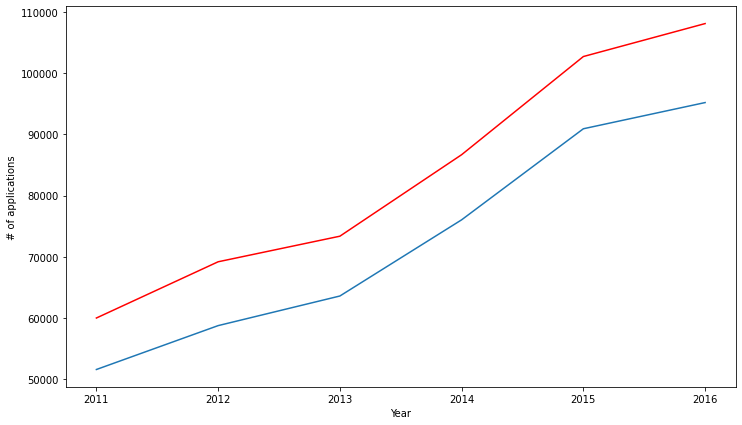

In [338]:
data1 = {'Year':[2011,2012,2013,2014,2015,2016],
         '# of applications': [y2011, y2012, y2013, y2014, y2015, y2016],
         '# of certified applications': [y2011c, y2012c, y2013c, y2014c, y2015c, y2016c]}

data11 = pd.DataFrame(data1)

sns.lineplot('Year', '# of applications', color='r', data=data11)
sns.lineplot('Year', '# of certified applications', data=data11)
plt.gcf().set_size_inches(12, 7);

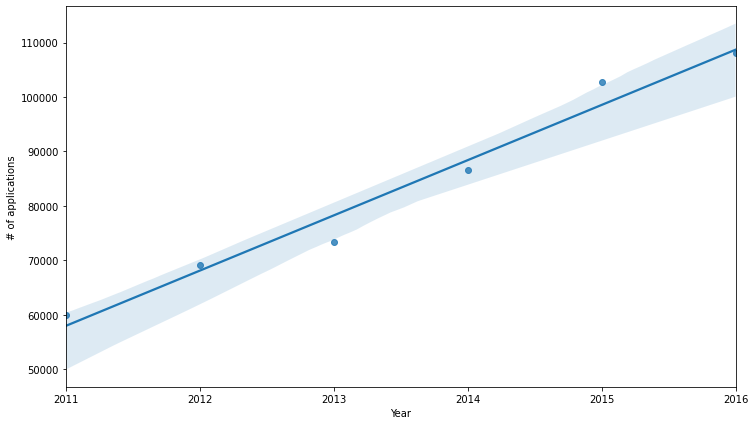

In [335]:
fig, ax = plt.subplots()
sns.regplot(x='Year', y= '# of applications', data=data11, ax=ax)
# ax2 = ax.twinx()
sns.regplot(x='Year', y= '# of certified applications', data=data11, ax=ax2)
plt.gcf().set_size_inches(12, 7);

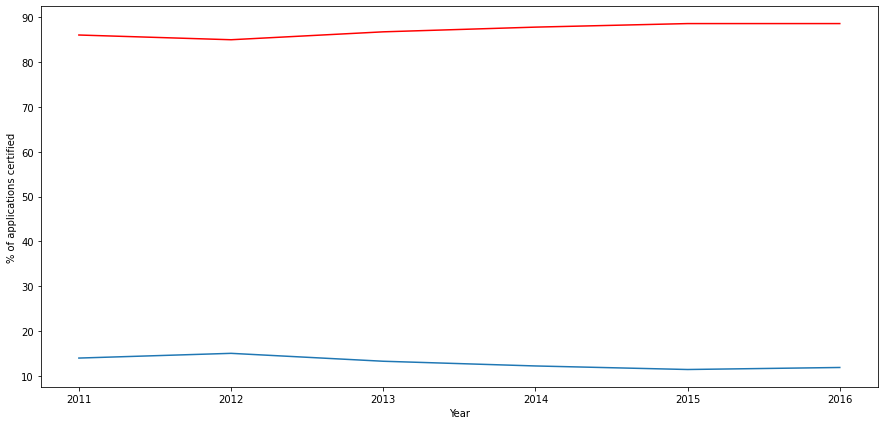

In [339]:
data2 = {'Year':[2011,2012,2013,2014,2015,2016],
         '% of applications certified': [(y2011c/y2011)*100, (y2012c/y2012)*100, (y2013c/y2013)*100, 
                                         (y2014c/y2014)*100, (y2015c/y2015)*100, (y2015c/y2015)*100],
         '% of applications denied, withdrawn or pending': [(1 -(y2011c/y2011))*100, (1 -(y2012c/y2012))*100,
                                                            (1 -(y2013c/y2013))*100, (1 -(y2014c/y2014))*100,
                                                            (1 -(y2015c/y2015))*100, (1 -(y2016c/y2016))*100]}

data22 = pd.DataFrame(data2)

sns.lineplot('Year', '% of applications certified', color='r', data=data22)
sns.lineplot('Year', '% of applications denied, withdrawn or pending', data=data22)
plt.gcf().set_size_inches(15, 7);

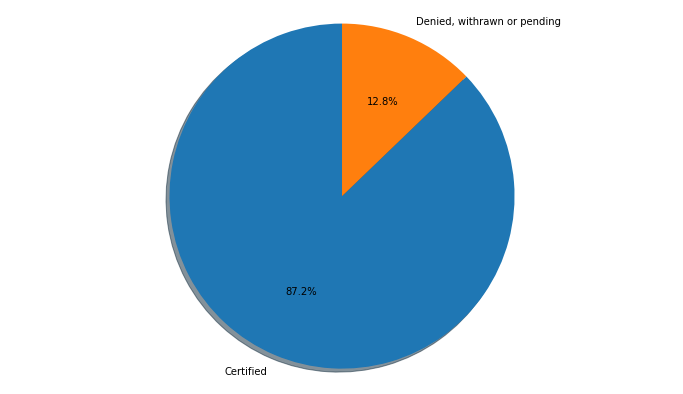

In [341]:
labels = 'Certified', 'Denied, withrawn or pending'
sizes = [87.1936, 12.8064]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.gcf().set_size_inches(12, 7);
plt.show()

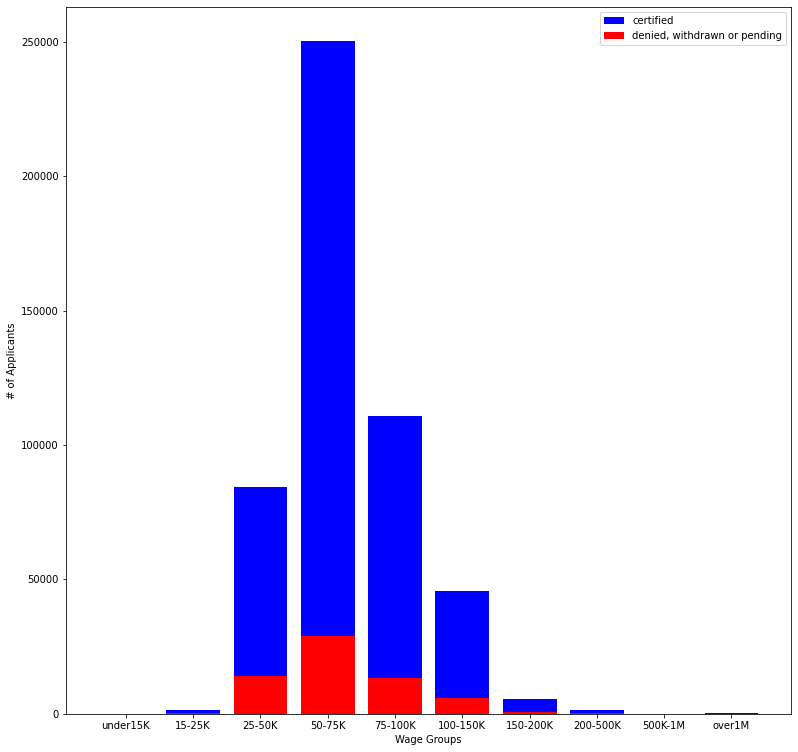

In [303]:
wage_groups = ['under15K', '15-25K', '25-50K', '50-75K', '75-100K','100-150K','150-200K','200-500K','500K-1M','over1M']
certified = np.array([1, 1174, 70137, 221476, 97500, 39944, 4617, 1104, 10, 331])
dwp = np.array([28, 408, 14144, 28897, 13227, 5814,831,303,54,0])
ind = [x for x, _ in enumerate(wage_groups)]
plt.figure(figsize=(13, 13))
plt.bar(ind, certified, width=0.8, label='certified', color='b', bottom=dwp)
plt.bar(ind, dwp, width=0.8, label='denied, withdrawn or pending', color='r')

plt.xticks(ind, wage_groups)
plt.ylabel("# of Applicants")
plt.xlabel("Wage Groups")
plt.legend(loc="upper right")
# plt.title(" ")

plt.show();

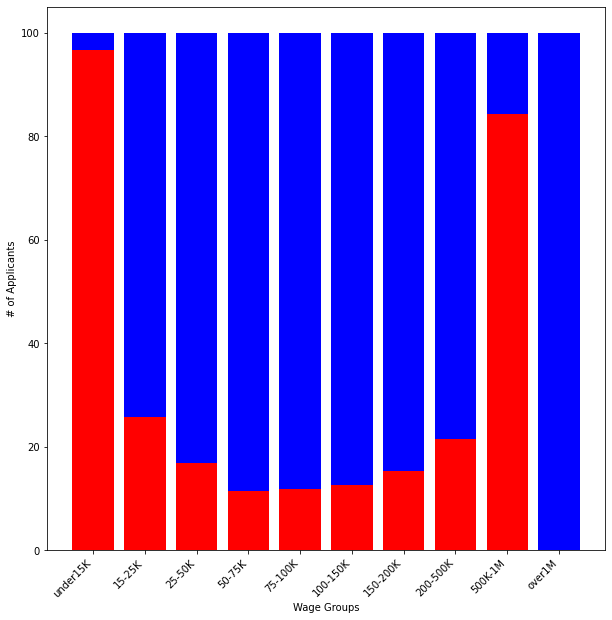

In [310]:
total = certified + dwp
proportion_certified = np.true_divide(certified, total) * 100
proportion_dwp = np.true_divide(dwp, total) * 100
plt.figure(figsize=(10, 10))

plt.bar(ind, proportion_certified, width=0.8, label='certified', color='b', bottom=proportion_dwp)
plt.bar(ind, proportion_dwp, width=0.8, label='denied, withdrawn or pending', color='r')

plt.xticks(ind, wage_groups)
plt.ylabel("# of Applicants")
plt.xlabel("Wage Groups")
plt.ylim=1.0
# plt.title(" ")

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();

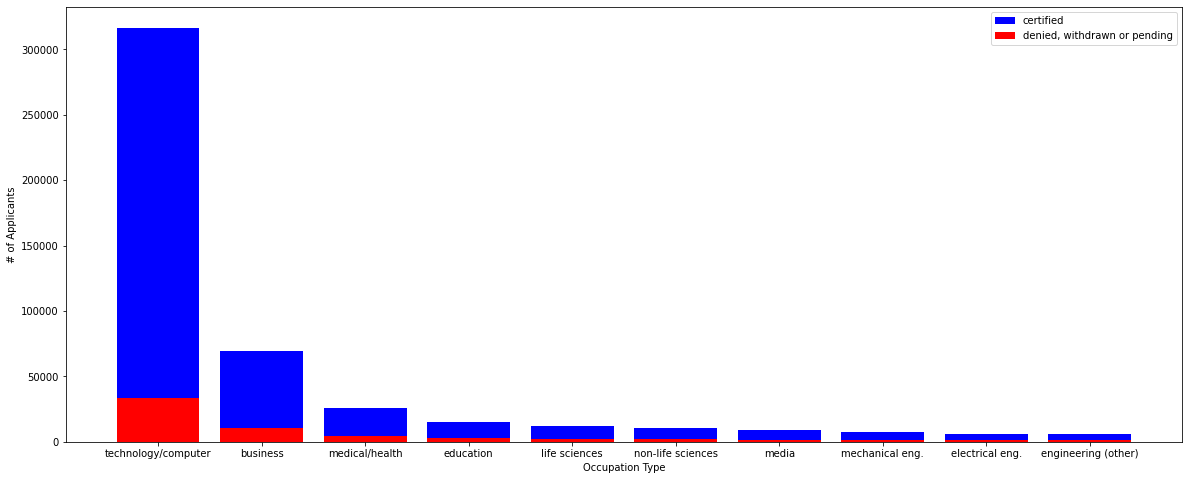

In [317]:
industry = ['technology/computer', 'business', 'medical/health', 'education', 'life sciences',
               'non-life sciences','media','mechanical eng.','electrical eng.','engineering (other)']
certified1 = np.array([282898, 59207, 21638, 12294, 9302, 8489, 7371, 6648, 5258, 4899])
dwp1 = np.array([33769, 10467, 4247, 2600, 2422, 1804, 1577, 1106,1031,1022])
ind = [x for x, _ in enumerate(industry)]
plt.figure(figsize=(20, 8))
plt.bar(ind, certified1, width=0.8, label='certified', color='b', bottom=dwp1)
plt.bar(ind, dwp1, width=0.8, label='denied, withdrawn or pending', color='r')

plt.xticks(ind, industry)
plt.ylabel("# of Applicants")
plt.xlabel("Occupation Type")
plt.legend(loc="upper right")
# plt.title(" ")

plt.show();

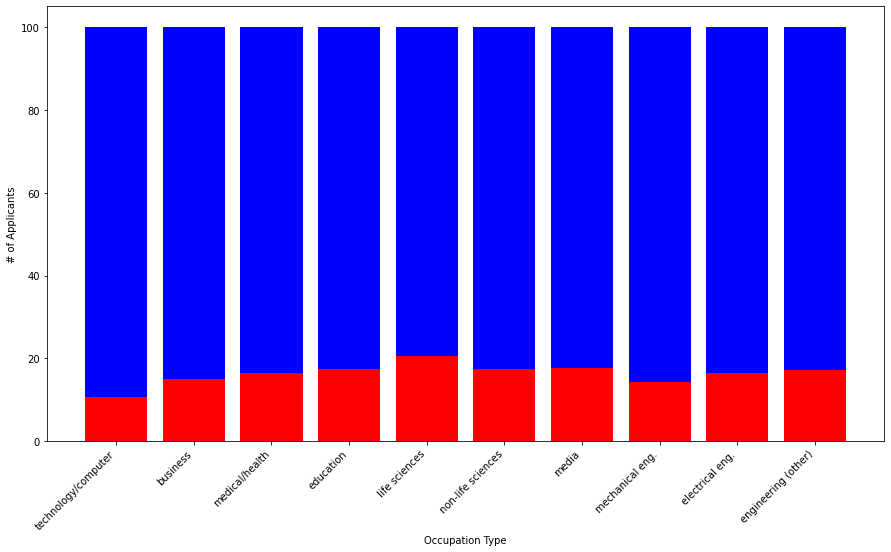

In [322]:
total1 = certified1 + dwp1
proportion_certified1 = np.true_divide(certified1, total1) * 100
proportion_dwp1 = np.true_divide(dwp1, total1) * 100
plt.figure(figsize=(15, 8))

plt.bar(ind, proportion_certified1, width=0.8, label='certified', color='b', bottom=proportion_dwp1)
plt.bar(ind, proportion_dwp1, width=0.8, label='denied, withdrawn or pending', color='r')

plt.xticks(ind, industry)
plt.ylabel("# of Applicants")
plt.xlabel("Occupation Type")
plt.ylim=1.0
# plt.title(" ")

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();

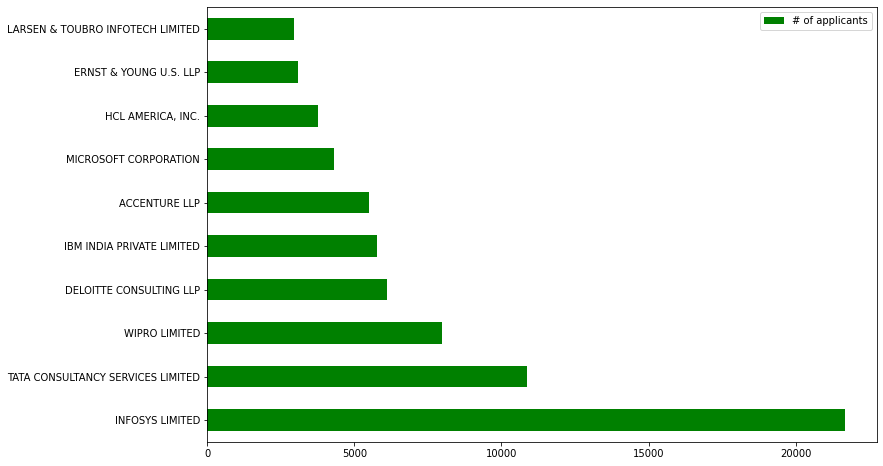

In [394]:
dff = df['EMPLOYER_NAME'].value_counts().head(11).to_frame()
dfff = dff.drop('Other')
dffff = dfff.rename(columns={'EMPLOYER_NAME': '# of applicants'})

dffff.plot(kind="barh", color='g', fontsize=10, figsize=(12,8));

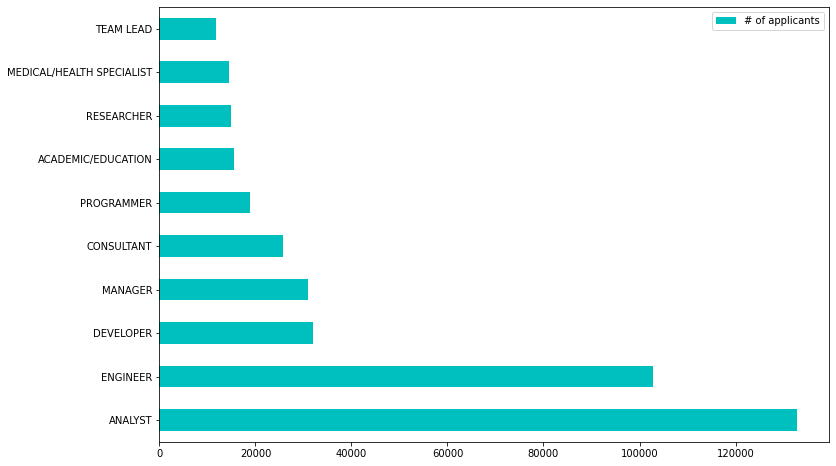

In [393]:
df['JOB_TITLE'].value_counts().head(11)

dfj = df['JOB_TITLE'].value_counts().head(11).to_frame()
dfjj = dfj.drop('Other')
dfjjj = dfjj.rename(columns={'JOB_TITLE': '# of applicants'})

dfjjj.plot(kind="barh", color='c', fontsize=10, figsize=(12,8));

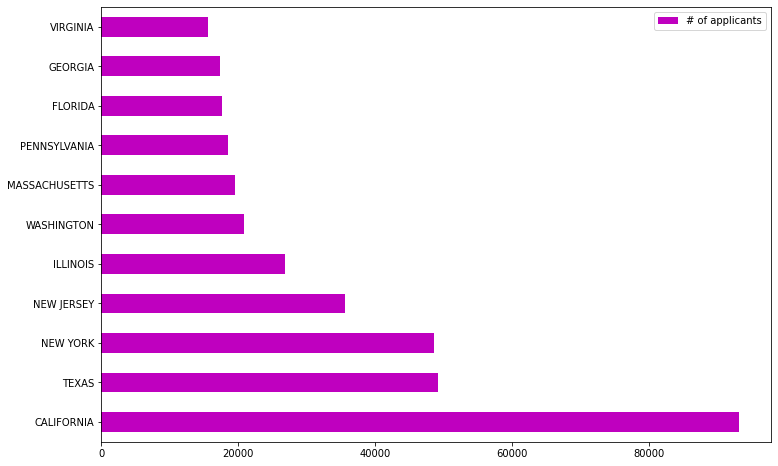

In [392]:
df['WORKSITE'].value_counts().head(10)

dfw = df['WORKSITE'].value_counts().head(11).to_frame()
dfww = dfw.rename(columns={'WORKSITE': '# of applicants'})

dfww.plot(kind="barh", color='m', fontsize=10, figsize=(12,8));

# 4. Split Data & Baseline Accuracy

In [482]:
target = 'CASE_STATUS'

y = df[target]
X = df.drop(columns=target)

In [483]:
cutoff_train  = 2014
mask_train  = X.index <= cutoff_train
X_train, y_train = X.loc[mask_train], y.loc[mask_train]

cutoff_val  = 2015
mask_val  = (X.index == cutoff_val)
X_val, y_val  = X.loc[mask_val], y.loc[mask_val]

cutoff_test  = 2016
mask_test  = X.index >= cutoff_test
X_test, y_test  = X.loc[mask_test], y.loc[mask_test]

In [484]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.8640889519099414


# 5. Models

## 5.1. Linear, i.e., Logistic

In [485]:
model_l_ = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
  )

model_l_.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                     'FULL_TIME_POSITION', 'WORKSITE'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, stra...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100

In [ ]:
print('Training Accuracy:', model_l_.score(X_train, y_train))
print('Validation Accuracy:', model_l_.score(X_val, y_val))

Training Accuracy: 0.8649362776461637
Validation Accuracy: 0.8850114861970954


Logistic Model Accuracy is: 0.8850114861970954

In [ ]:
model_l_.predict(X_test)

array(['CERTIFIED', 'CERTIFIED', 'CERTIFIED', ..., 'CERTIFIED',
       'CERTIFIED', 'CERTIFIED'], dtype=object)

In [ ]:
model_l_.predict_proba(X_test)

array([[0.86364096, 0.13635904],
       [0.95600582, 0.04399418],
       [0.75285784, 0.24714216],
       ...,
       [0.9828753 , 0.0171247 ],
       [0.96440538, 0.03559462],
       [0.86157791, 0.13842209]])

#### 5.1.1.1. RandomizedSearchCV for Logistic Model:

In [ ]:
estimator_l = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

params_l  = {
    'simpleimputer__strategy':['most_frequent'],
    # 'standardscaler_with_mean':[True, False],
    # 'standardscaler_with_std':[True, False],
    'logisticregression__penalty':['l1','l2','elasticnet'],
    'logisticregression__dual':[True, False],
    'logisticregression__tol':[0.0001, 0.0002, 0.0003],
    'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    # 'logisticregression__fit_intercept':[True, False],
    # # 'logisticregression__intercept_scaling':[1},
    # 'logisticregression__class_weight':['balanced', 'none'],
    # 'logisticregression__max_iter':['balanced'],
    # 'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

In [ ]:
# # BayesianSearch CV

# model_bs = BayesSearchCV(
#     estimator_l,
#     search_spaces=params_l,
#     # n_iter=5,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )
# model_bs.fit(X_train, y_train);

In [ ]:
model_l = RandomizedSearchCV(
    estimator_l,
    param_distributions=params_l,
#     n_iter=5,
    cv=5,
    n_jobs=-1,
    verbose=1
) 

model_l.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
model_l.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__dual': False,
 'logisticregression__penalty': 'l2',
 'logisticregression__tol': 0.0001,
 'simpleimputer__strategy': 'most_frequent'}

In [ ]:
model_l.best_score_

0.8649189852842001

In [ ]:
model_l.best_estimator_

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                     'FULL_TIME_POSITION', 'WORKSITE'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, stra...
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    mult

In [ ]:
model_log = GridSearchCV(
    estimator_l,
    param_grid=params_l,
#     n_iter=5,
    cv=5,
    n_jobs=-1,
    verbose=1
) 

model_log.fit(X_train, y_train);

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 35.2min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
model_log.best_params_

{'logisticregression__C': 10,
 'logisticregression__dual': False,
 'logisticregression__penalty': 'l2',
 'logisticregression__tol': 0.0001,
 'simpleimputer__strategy': 'most_frequent'}

In [ ]:
model_log.best_score_

0.8649259022289856

In [ ]:
model_log.best_estimator_

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                     'FULL_TIME_POSITION', 'WORKSITE'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, stra...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,

## 5.2. Tree-based

### 5.2.1. Random Forest Classifier

In [503]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25,
                           n_jobs=-1,
                           random_state=42)
)

model.fit(X_train, y_train);

In [ ]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.9239654844455204
Validation Accuracy: 0.851049332243118


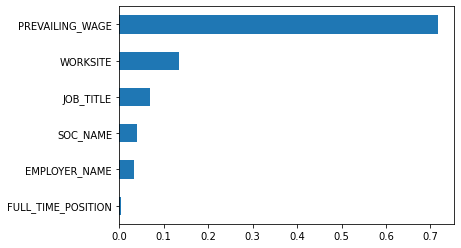

In [ ]:
importances = model.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().tail(10).plot(kind='barh');

Logistic Model Accuracy is: 0.8850114861970954

RF Model Accuracy is: 0.851049332243118

#### 5.2.1.1. RandomizedSearchCV for RF Model:

In [ ]:
estimator = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(random_state=42)
)

params  = {
    # 'simpleimputer__strategy':['most_frequent'],
    'randomforestclassifier__n_estimators':range(75, 350, 25),
    'randomforestclassifier__max_depth':range(5, 26, 5),
    'randomforestclassifier__max_samples':[0.6, 0.7, 0.8],
    'randomforestclassifier__max_features':['auto','log2', range(1, 10, 1)],
    # 'randomforestclassifier__min_samples_split':[2, 5],
    'randomforestclassifier__min_samples_leaf':[1, 2, 4],
}

In [ ]:
# # BayesianSearch CV

# model_bs = BayesSearchCV(
#     estimator,
#     search_spaces=params,
#     # n_iter=5,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )
# model_bs.fit(X_train, y_train);

In [ ]:
model_rs = RandomizedSearchCV(
    estimator,
    param_distributions=params,
#     n_iter=5,
    cv=5,
    n_jobs=5,
    verbose=1
) 

model_rs.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  9.8min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed: 11.1min finished


In [ ]:
model_rs.best_params_

{'randomforestclassifier__max_depth': 25,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__max_samples': 0.7,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'most_frequent'}

In [ ]:
model_rs.best_score_

0.8605059745110586

In [ ]:
model_rs.best_estimator_

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                      'FULL_TIME_POSITION', 'WORKSITE'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'EMPLOYER_NAME',
                                          'data_type': dtype('O'),
                                          'mapping': Other                                               1
FUJITSU AMERICA, INC.                               2
CAPGEMINI FINANCIAL SERVICES USA INC                3
KPIT INFOSYSTEMS, INC....
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features='log2',
                                        max_leaf_nodes=None

In [ ]:
model_rf = GridSearchCV(
    estimator,
    param_grid=params,
#     n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1
) 

model_rf.fit(X_train, y_train);

In [ ]:
model_rf.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_samples': 0.8,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
model_rf.best_score_

0.8652509982479256

In [ ]:
model_rf.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                      'FULL_TIME_POSITION', 'WORKSITE'],
                                mapping=[{'col': 'EMPLOYER_NAME',
                                          'data_type': dtype('O'),
                                          'mapping': Other                                               1
FUJITSU AMERICA, INC.                               2
CAPGEMINI FINANCIAL SERVICES USA INC                3
KPIT INFOSYSTEMS, INC.                              4
MICROSOFT CORPORATION                               5
ORACLE AMERICA, INC.                                6
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPOR...
TENNESSEE               35
NA                      36
UTAH                    37
NEW HAMPSHIRE           38
MAINE                   39
ARKANSAS                40
NEVADA                  41
HAWAII                  42
OREGON                  43
PUERTO RICO  

### 5.2.2. Gradient Boost Classifier

In [505]:
model_ = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    GradientBoostingClassifier(n_estimators=25,
                               learning_rate=0.1,
                               random_state=42)
)

model_.fit(X_train, y_train);

In [ ]:
print('Training Accuracy:', model_.score(X_train, y_train))
print('Validation Accuracy:', model_.score(X_val, y_val))

Training Accuracy: 0.8652682909958671
Validation Accuracy: 0.8851185609157809


Logistic Model Accuracy is: 0.8850114861970954

RF Model Accuracy is: 0.851049332243118

GB Model Accuracy is: 0.8851185609157809

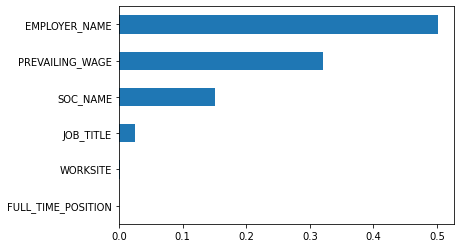

In [ ]:
importances = model_.named_steps['gradientboostingclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().tail(10).plot(kind='barh');

#### 5.2.2.1. RandomizedSearchCV for GB Model:

In [ ]:
estimator1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    GradientBoostingClassifier(random_state=42)
)

params1  = {
#     'simpleimputer__strategy':['mean','median','most_frequent'],
    'gradientboostingclassifier__n_estimators':range(25, 150, 25),
    'gradientboostingclassifier__max_depth':range(3, 16, 3),
    'gradientboostingclassifier__max_features':['auto','log2', range(2, 10, 1)],
#     'gradientboostingclassifier__min_samples_split':[2, 3, 5],
#     'gradientboostingclassifier__min_samples_leaf':[1, 2, 4],
#     'gradientboostingclassifier__loss': {‘deviance’, ‘exponential’}, default=’deviance’
    'gradientboostingclassifier__learning_rate':[0.1, 0.2]
#     'gradientboostingclassifier__subsample':float, default=1.0
#     'gradientboostingclassifier__criterion': {‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
#     'gradientboostingclassifier__min_weight_fraction_leaf': float, default=0.0
#     'gradientboostingclassifier__min_impurity_decrease':  float, default=0.0
#     'gradientboostingclassifier__min_impurity_split': float, default=None
#     'gradientboostingclassifier__max_leaf_nodes': int, default=None


}

In [ ]:
model_gb = RandomizedSearchCV(
    estimator1,
    param_distributions=params1,
#     n_iter=5,
    n_jobs=5,
#     cv=5,
    verbose=1
) 

model_gb.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  8.1min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed: 10.5min finished


In [ ]:
model_gb.best_params_

{'gradientboostingclassifier__learning_rate': 0.2,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': 'auto',
 'gradientboostingclassifier__n_estimators': 125}

In [ ]:
model_gb.best_score_

0.8652544571062961

In [ ]:
model_gb.best_estimator_

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                      'FULL_TIME_POSITION', 'WORKSITE'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'EMPLOYER_NAME',
                                          'data_type': dtype('O'),
                                          'mapping': Other                                               1
FUJITSU AMERICA, INC.                               2
CAPGEMINI FINANCIAL SERVICES USA INC                3
KPIT INFOSYSTEMS, INC....
                                            learning_rate=0.2, loss='deviance',
                                            max_depth=3, max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_de

In [ ]:
model_gr = GridSearchCV(
    estimator_1,
    param_grid=params_1,
#     n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1
) 

model_gr.fit(X_train, y_train);

In [ ]:
model_gr.best_params_

In [ ]:
model_gr.best_score_

In [ ]:
model_gr.best_estimator_

### 5.2.3. XGBoost Classifier

In [494]:
model__ = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    XGBClassifier(n_jobs=10,
                  random_state=42)
)

model__.fit(X_train, y_train);

In [ ]:
print('Training Accuracy:', model__.score(X_train, y_train))
print('Validation Accuracy:', model__.score(X_val, y_val))

Training Accuracy: 0.8653167096093656
Validation Accuracy: 0.885157497177121


Logistic Model Accuracy is: 0.8850114861970954

RF Model Accuracy is: 0.851049332243118

GB Model Accuracy is: 0.8851185609157809

XGB Model Accuracy is: 0.885157497177121

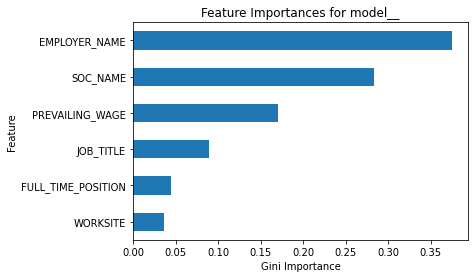

In [ ]:
importances = model__.named_steps['xgbclassifier'].feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')

plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for model__');

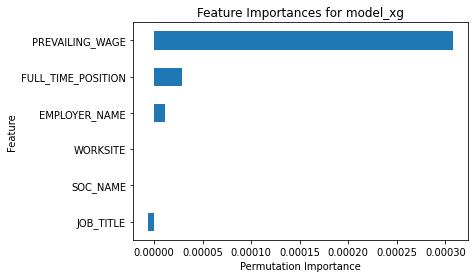

In [ ]:
dt = pd.DataFrame({'importances_mean': perm_imp['importances_mean']}, index = X_val.columns)

dt['importances_mean'].sort_values().tail(10).plot(kind='barh')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for model_xg');

#### 5.2.3.1. RandomizedSearchCV for XGB Model:

In [ ]:
from sklearn.inspection import permutation_importance

perm_imp  = permutation_importance(model__, 
                                   X_val, 
                                   y_val, 
                                   n_jobs=10, 
                                   random_state=42)

In [ ]:
estimator2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    XGBClassifier(n_jobs=10,
                  random_state=42)
)

params2  = {
    # 'simpleimputer__strategy':['mean','median','most_frequent'],
    # 'gradientboostingclassifier__n_estimators':range(50, 450, 25),
    'xgbclassifier__booster':['gbtree', 'gblinear', 'dart'],
    'xgbclassifier__max_depth':range(3, 25, 3),
    # 'gradientboostingclassifier__max_features':['auto','log2', range(1, 20, 1)],
    # 'gradientboostingclassifier__min_samples_split':[2, 3, 5],
    # 'gradientboostingclassifier__min_samples_leaf':[1, 2, 4],
    # 'gradientboostingclassifier__loss': {‘deviance’, ‘exponential’}, default=’deviance’
    'xgbclassifier__learning_rate':[0.1, 0.2, 0.3],
    'xgbclassifier__subsample':[0.5,0.7,1],
    # 'gradientboostingclassifier__subsample':float, default=1.0
    # 'gradientboostingclassifier__criterion': {‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
    'xgbclassifier__grow_policy':['depthwise', 'lossguide']


}

In [ ]:
model_xgb = RandomizedSearchCV(
    estimator2,
    param_distributions=params2,
#     n_iter=5,
    cv=5,
    verbose=1
) 

model_xgb.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.8min finished


In [ ]:
model_xgb.best_params_

{'xgbclassifier__booster': 'dart',
 'xgbclassifier__grow_policy': 'depthwise',
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__subsample': 0.7}

In [ ]:
model_xgb.best_score_

0.8652579155786888

In [ ]:
model_xgb.best_estimator_

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                      'FULL_TIME_POSITION', 'WORKSITE'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'EMPLOYER_NAME',
                                          'data_type': dtype('O'),
                                          'mapping': Other                                               1
FUJITSU AMERICA, INC.                               2
CAPGEMINI FINANCIAL SERVICES USA INC                3
KPIT INFOSYSTEMS, INC....
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               grow_policy='depthwise', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
             

In [ ]:
model_x = GridSearchCV(
    estimator_2,
    param_grid=params_2,
#     n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1
) 

model_x.fit(X_train, y_train);

In [ ]:
model_x.best_params_

In [ ]:
model_x.best_score_

In [ ]:
model_x.best_estimator_

# 6. Other Evaluation Metrics

## 6.1. Confusion Matrices

### 6.1.1. Logistic Model

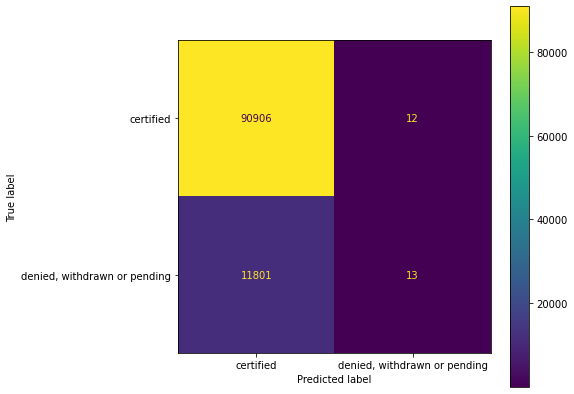

In [527]:
fig, ax = plt.subplots(figsize=(7, 7))

plot_confusion_matrix(
    model_l_,
    X_val,
    y_val,
    ax=ax,
    values_format='.0f',
    display_labels=['certified', 'denied, withdrawn or pending']
);

In [401]:
# Recall: 
# Of those applications that are denied, withdrawn or pending, 
# what proportion did you correctly predict as being denied, withdrawn or pending?

# Recall:   TP/(FN+TP)

13/(11801+13)

0.001100389368545793

In [402]:
# Precision: 
# Of all the applications that you predicted as being denied, withdrawn or pending, 
# what proportion is actually denied, withdrawn or pending?

# Precision:  TP/(FP+TP)

13/(12+13)

0.52

In [501]:
print(classification_report(y_val,
                            model_l_.predict(X_val),
                            target_names=['certified', 'denied, withdrawn or pending']))

                              precision    recall  f1-score   support

                   certified       0.89      1.00      0.94     90918
denied, withdrawn or pending       0.52      0.00      0.00     11814

                    accuracy                           0.89    102732
                   macro avg       0.70      0.50      0.47    102732
                weighted avg       0.84      0.89      0.83    102732



### 6.1.2. XGBoost Model

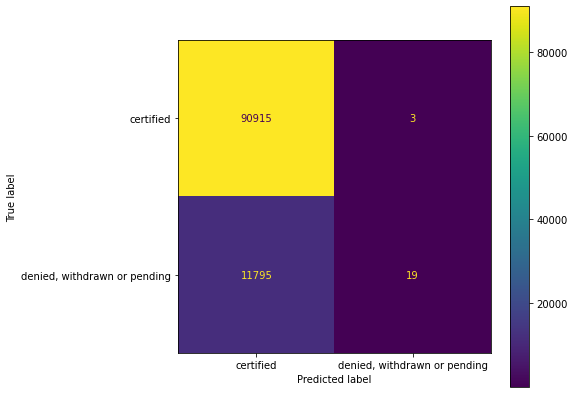

In [528]:
fig, ax = plt.subplots(figsize=(7, 7))

plot_confusion_matrix(
    model__,
    X_val,
    y_val,
    ax=ax,
    values_format='.0f',
    display_labels=['certified', 'denied, withdrawn or pending']
);

In [498]:
# Recall: 
# Of those applications that are denied, withdrawn or pending, 
# what proportion did you correctly predict as being denied, withdrawn or pending?

# Recall:   TP/(FN+TP)

19/(11795+19)

0.0016082613847976975

In [499]:
# Precision: 
# Of all the applications that you predicted as being denied, withdrawn or pending, 
# what proportion is actually denied, withdrawn or pending?

# Precision:  TP/(FP+TP)

19/(3+19)

0.8636363636363636

In [500]:
print(classification_report(y_val,
                            model__.predict(X_val),
                            target_names=['certified', 'denied, withdrawn or pending']))

                              precision    recall  f1-score   support

                   certified       0.89      1.00      0.94     90918
denied, withdrawn or pending       0.86      0.00      0.00     11814

                    accuracy                           0.89    102732
                   macro avg       0.87      0.50      0.47    102732
                weighted avg       0.88      0.89      0.83    102732



## 6.2. ROC-AUC SCORES

In [506]:
print("logistic regression model roc auc score for val is", roc_auc_score(y_val, model_l_.predict_proba(X_val)[:,1]))
print("logistic regression model roc auc score for test is", roc_auc_score(y_test, model_l_.predict_proba(X_test)[:,1]))
print()
print("random forest model roc auc score for val is", roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))
print("random forest model roc auc score for test is", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print()
print("gradient boost model roc auc score for val is", roc_auc_score(y_val, model_.predict_proba(X_val)[:,1]))
print("gradient boost model roc auc score for test is", roc_auc_score(y_test, model_.predict_proba(X_test)[:,1]))
print()
print("XGBoost model roc auc score for val is", roc_auc_score(y_val, model__.predict_proba(X_val)[:,1]))
print("XGBoost model roc auc score for test is", roc_auc_score(y_test, model__.predict_proba(X_test)[:,1]))

logistic regression model roc auc score for val is 0.6396721719967905
logistic regression model roc auc score for test is 0.6291471667564915

random forest model roc auc score for val is 0.5764642900191314
random forest model roc auc score for test is 0.5216913665077221

gradient boost model roc auc score for val is 0.6250546613098583
gradient boost model roc auc score for test is 0.5978803323118995

XGBoost model roc auc score for val is 0.6370743060103758
XGBoost model roc auc score for test is 0.616272464340416


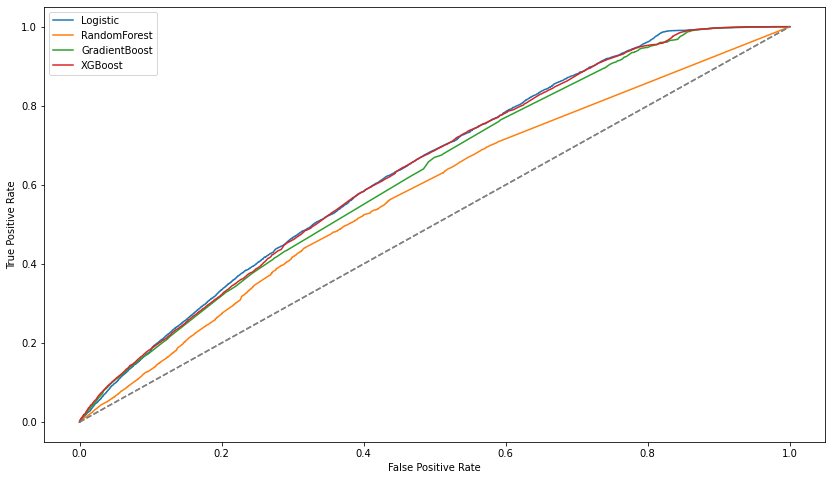

In [522]:
lr = plot_roc_curve(model_l_, X_val, y_val, label='Logistic')
rf = plot_roc_curve(model, X_val, y_val, ax=lr.ax_, label='RandomForest')
gb = plot_roc_curve(model_, X_val, y_val, ax=lr.ax_, label='GradientBoost')
xgb = plot_roc_curve(model__, X_val, y_val, ax=lr.ax_, label='XGBoost')
plt.gcf().set_size_inches(14, 8)
plt.plot([(0,0), (1,1)], color='grey', linestyle='--')
plt.legend();

# 7. PDP

In [ ]:
# Fit a model on thedata
# target = 'CASE_STATUS'
# y = df[target]
# X = df.drop(columns=target)

# Use Ordinal Encoder, outside of a pipeline

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model_pdp = RandomForestClassifier(n_estimators=400, 
                                   max_depth=15, 
                                   max_features='log2', 
                                   max_samples=0.6,
                                   random_state=42, 
                                   min_samples_leaf=4, 
                                   min_samples_split=2,
                                   n_jobs=-1)
model_pdp.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='log2',
                       max_leaf_nodes=None, max_samples=0.6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


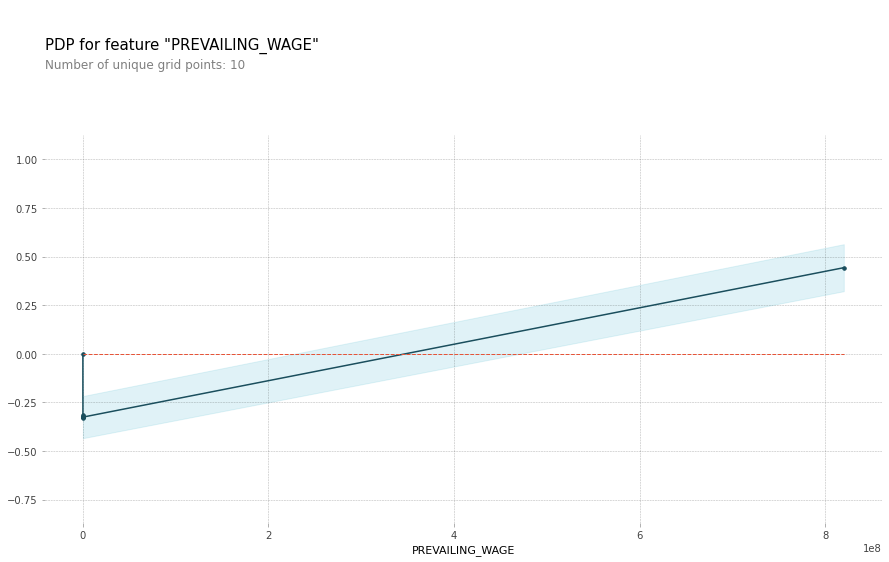

In [ ]:
# Use Pdpbox
%matplotlib inline

feature = 'PREVAILING_WAGE'
pdp_dist = pdp.pdp_isolate(model=model_pdp, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [ ]:
# Look at the encoder's mappings

encoder.mapping

[{'col': 'EMPLOYER_NAME',
  'data_type': dtype('O'),
  'mapping': CONNECTICUT COMPUTER CONSULTING COMPANY             1
  SUNTECHPROS INC.                                    2
  PRESIDIO NETWORKED SOLUTIONS, INC.                  3
  MODIV MEDIA, INC.                                   4
  APPLIED MATERIALS, INC.                             5
                                                  ...  
  INVIVO CORPORATION (A PHILIPS OWNED COMPANY)    88752
  RLS2000.COM, INC.                               88753
  FAPL LLC                                        88754
  GREENWING PETROLEUM LLC                         88755
  NaN                                                -2
  Length: 88756, dtype: int64},
 {'col': 'SOC_NAME',
  'data_type': dtype('O'),
  'mapping': Computer Software Engineers, Applications                1
  Computer Programmers                                     2
  Network and Computer Systems Administrators              3
  Computer Systems Analysts                   

In [ ]:
# pdp.pdp_plot(pdp_dist, feature)

# # Manually change the xticks labels
# plt.xticks([1, 2], ['male', 'female']);

In [ ]:
# Let's automate it

feature = 'SOC_NAME'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

In [ ]:
# pdp.pdp_plot(pdp_dist, feature)

# # Automatically change the xticks labels

# plt.xticks(category_codes, category_names);

### The following two cells of codes encounter problems due to high cardinality of the categorical column at hand; I will deal with the columns and wranglee them further in the weekend

In [ ]:
features = ['SOC_NAME', 'PREVAILING_WAGE']

interaction = pdp.pdp_interact(
    model=model_pdp, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp.pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of H1B visa certification, on SOC_NAME & wage');

# 8. SHAPLEY

In [ ]:
# random example row

row = X_test.iloc[[128]]

In [ ]:
row

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
YEAR,,,,,,
2016,Other,Technology/Computer Occupation,ANALYST,N,41933.0,TEXAS


In [ ]:
oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
model_s = XGBClassifier(n_jobs=10)
model_s.fit(X_train_T, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=10,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model_s.predict(oe.transform(row))

array(['CERTIFIED'], dtype=object)

In [ ]:
df["CASE_STATUS"].value_counts()

CERTIFIED                       435968
DENIED, WITHDRAWN or PENDING     64032
Name: CASE_STATUS, dtype: int64

In [ ]:
model_s.classes_

array(['CERTIFIED', 'DENIED, WITHDRAWN or PENDING'], dtype=object)

In [ ]:
explainer = TreeExplainer(model_s)#

initjs()

force_plot(
    link='logit',
    base_value=explainer.expected_value[0],
    shap_values=explainer.shap_values(oe.transform(row))[0],
    features=row
)

In [ ]:
model_s.predict_proba(oe.transform(row))

array([[0.851184  , 0.14881597]], dtype=float32)